In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
plt.style.use('seaborn-darkgrid')

**Link**: [World Happiness](https://www.kaggle.com/unsdsn/world-happiness)

**Context**

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

**Content**

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

**Inspiration**

What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness? How did country ranks or scores change between the 2015 and 2016 as well as the 2016 and 2017 reports? Did any country experience a significant increase or decrease in happiness?

*What is Dystopia?*

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

*What are the residuals?*

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average 2014-2016 life evaluations. These residuals have an average value of approximately zero over the whole set of countries. Figure 2.2 shows the average residual for each country when the equation in Table 2.1 is applied to average 2014- 2016 data for the six variables in that country. We combine these residuals with the estimate for life evaluations in Dystopia so that the combined bar will always have positive values. As can be seen in Figure 2.2, although some life evaluation residuals are quite large, occasionally exceeding one point on the scale from 0 to 10, they are always much smaller than the calculated value in Dystopia, where the average life is rated at 1.85 on the 0 to 10 scale.

*What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?*

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country as stated in the previous answer.

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

In [29]:
wh_2015 = pd.read_csv("data/2015.csv")
wh_2016 = pd.read_csv("data/2016.csv")
wh_2017 = pd.read_csv("data/2017.csv")
wh_2018 = pd.read_csv("data/2018.csv")
wh_2019 = pd.read_csv("data/2019.csv")

---
## **1. EXPLORE THE DATA TO GAIN INSIGHTS**
---

There are 5 datas that I need to transform before doing the exploratory data analysis.
- Drop columns where not every data have it in their dataset.
- Change the columns name and the columns order so it will be easier to analyze.

In [30]:
region = wh_2015[["Country", "Region"]]

In [31]:
wh_2015 = wh_2015.drop(["Standard Error", "Dystopia Residual", "Region"], axis = 1)
wh_2016 = wh_2016.drop(["Lower Confidence Interval", "Upper Confidence Interval", "Dystopia Residual", "Region"], axis = 1)
wh_2017 = wh_2017.drop(["Whisker.high", "Whisker.low", "Dystopia.Residual"], axis = 1)

In [32]:
wh_2015.rename(columns = {"Country": "country",
                          "Happiness Rank": "rank",
                          "Happiness Score": "score",
                          "Economy (GDP per Capita)": "gdp",
                          "Family": "family",
                          "Health (Life Expectancy)": "life_expectancy",
                          "Freedom": "freedom",
                          "Trust (Government Corruption)": "perceptions_of_corruption",
                          "Generosity": "generosity"}, inplace = True)

wh_2016.rename(columns = {"Country": "country",
                          "Happiness Rank": "rank",
                          "Happiness Score": "score",
                          "Economy (GDP per Capita)": "gdp",
                          "Family": "family",
                          "Health (Life Expectancy)": "life_expectancy",
                          "Freedom": "freedom",
                          "Trust (Government Corruption)": "perceptions_of_corruption",
                          "Generosity": "generosity"}, inplace = True)

wh_2017.rename(columns = {"Country": "country",
                          "Happiness.Rank": "rank",
                          "Happiness.Score": "score",
                          "Economy..GDP.per.Capita.": "gdp",
                          "Family": "family",
                          "Health..Life.Expectancy.": "life_expectancy",
                          "Freedom": "freedom",
                          "Trust..Government.Corruption.": "perceptions_of_corruption",
                          "Generosity": "generosity"}, inplace = True)

wh_2018.rename(columns = {"Country or region": "country",
                          "Overall rank": "rank",
                          "Score": "score",
                          "GDP per capita": "gdp",
                          "Social support": "family",
                          "Healthy life expectancy": "life_expectancy",
                          "Freedom to make life choices": "freedom",
                          "Perceptions of corruption": "perceptions_of_corruption",
                          "Generosity": "generosity"}, inplace = True)

wh_2019.rename(columns = {"Country or region": "country",
                          "Overall rank": "rank",
                          "Score": "score",
                          "GDP per capita": "gdp",
                          "Social support": "family",
                          "Healthy life expectancy": "life_expectancy",
                          "Freedom to make life choices": "freedom",
                          "Perceptions of corruption": "perceptions_of_corruption",
                          "Generosity": "generosity"}, inplace = True)

In [33]:
columns = wh_2015.columns
wh_2017 = wh_2017[columns]; wh_2018 = wh_2018[columns]; wh_2019 = wh_2019[columns]
wh_2015["year"] = 2015; wh_2016["year"] = 2016; wh_2017["year"] = 2017; wh_2018["year"] = 2018; wh_2019["year"] = 2019

In [34]:
df = wh_2015.append(wh_2016)
df = df.append(wh_2017)
df = df.append(wh_2018)
df = df.append(wh_2019)
df = pd.merge(df, region, left_on = "country", right_on = "Country")
df = df.drop("Country", axis = 1)
df.rename(columns = {"Region": "region"}, inplace = True)

In [35]:
df.head()

country  rank  score      gdp    family  life_expectancy   freedom  \
0  Switzerland     1  7.587  1.39651  1.349510         0.941430  0.665570   
1  Switzerland     2  7.509  1.52733  1.145240         0.863030  0.585570   
2  Switzerland     4  7.494  1.56498  1.516912         0.858131  0.620071   
3  Switzerland     5  7.487  1.42000  1.549000         0.927000  0.660000   
4  Switzerland     6  7.480  1.45200  1.526000         1.052000  0.572000   

   perceptions_of_corruption  generosity  year          region  
0                   0.419780    0.296780  2015  Western Europe  
1                   0.412030    0.280830  2016  Western Europe  
2                   0.367007    0.290549  2017  Western Europe  
3                   0.357000    0.256000  2018  Western Europe  
4                   0.343000    0.263000  2019  Western Europe

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 0 to 756
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    757 non-null    object 
 1   rank                       757 non-null    int64  
 2   score                      757 non-null    float64
 3   gdp                        757 non-null    float64
 4   family                     757 non-null    float64
 5   life_expectancy            757 non-null    float64
 6   freedom                    757 non-null    float64
 7   perceptions_of_corruption  756 non-null    float64
 8   generosity                 757 non-null    float64
 9   year                       757 non-null    int64  
 10  region                     757 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 71.0+ KB


In [37]:
df.nunique()

country                      158
rank                         158
score                        695
gdp                          724
family                       709
life_expectancy              683
freedom                      676
perceptions_of_corruption    617
generosity                   648
year                           5
region                        10
dtype: int64

In [38]:
df.describe()

rank       score         gdp      family  life_expectancy  \
count  757.000000  757.000000  757.000000  757.000000       757.000000   
mean    78.384412    5.388122    0.921814    1.082495         0.617248   
std     45.317328    1.130053    0.403176    0.327899         0.245764   
min      1.000000    2.693000    0.000000    0.000000         0.000000   
25%     39.000000    4.508000    0.619000    0.872000         0.454000   
50%     78.000000    5.324000    0.986000    1.125750         0.652130   
75%    118.000000    6.218000    1.241420    1.331000         0.809250   
max    158.000000    7.769000    2.096000    1.644000         1.141000   

          freedom  perceptions_of_corruption  generosity         year  
count  757.000000                 756.000000  757.000000   757.000000  
mean     0.410317                   0.124820    0.218527  2016.974901  
std      0.152520                   0.106029    0.123094     1.421920  
min      0.000000                   0.000000    0.000000  2015.000000  
25%      0.309000                   0.053888    0.129762  2016.000000  
50%      0.430540                   0.089141    0.201800  2017.000000  
75%      0.531000                   0.155313    0.280000  2018.000000  
max      0.724000                   0.551910    0.838075  2019.000000

- Since 2015, on average total happiness score have positive trend.
- Average GDP have positive trend even got down in year 2018 and the number perception of corruption have negative trend. It seems many countries doing well and create a better systems to increase their GDP but the people have trust issue with their government.
- The countries are divided ny 10 regional and Sub-Saharan Africa have the most number country followed by Central and Eastern Europe.
- In term of hapiness score, Australia, North America, and Western Europe are 3 regionals who have the highest average score. Sub-Saharan Africa become the lowest happiness score.
- In term of GDP and family support, the result is same like happiness score, Australia, North America, and Western Europe are 3 regionals who have the highest score. Sub-Saharan Africa become the lowest score.
- In term of life expectancy, same like happiness score but there is one regioal which have high score, Eastern Asia.
- In term of freedom, Australia, North America, Southeastern Asia and Western Europe have the higest score.
- In term perceptions of corruption, only Autralian regional which have highest score. People from other region tend to not trust their government in term of corruption.
- In term of generosity, people from Australia, North America, Southeastern Asia and Western Europe have the higest score.
- There are 3 regionals which very concistent and always have high score, Australia, North America and Western Europe. Many countries from other regional can learned from countries from these regional to increase the happiness score.

In [39]:
data_graph = df.groupby("year").mean().reset_index()
columns = data_graph.columns[2:]
for col in columns:
    data_graph[str(col) + " change"] = data_graph[col].pct_change()
    data_graph[str(col) + " change"].fillna(0, inplace = True)

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


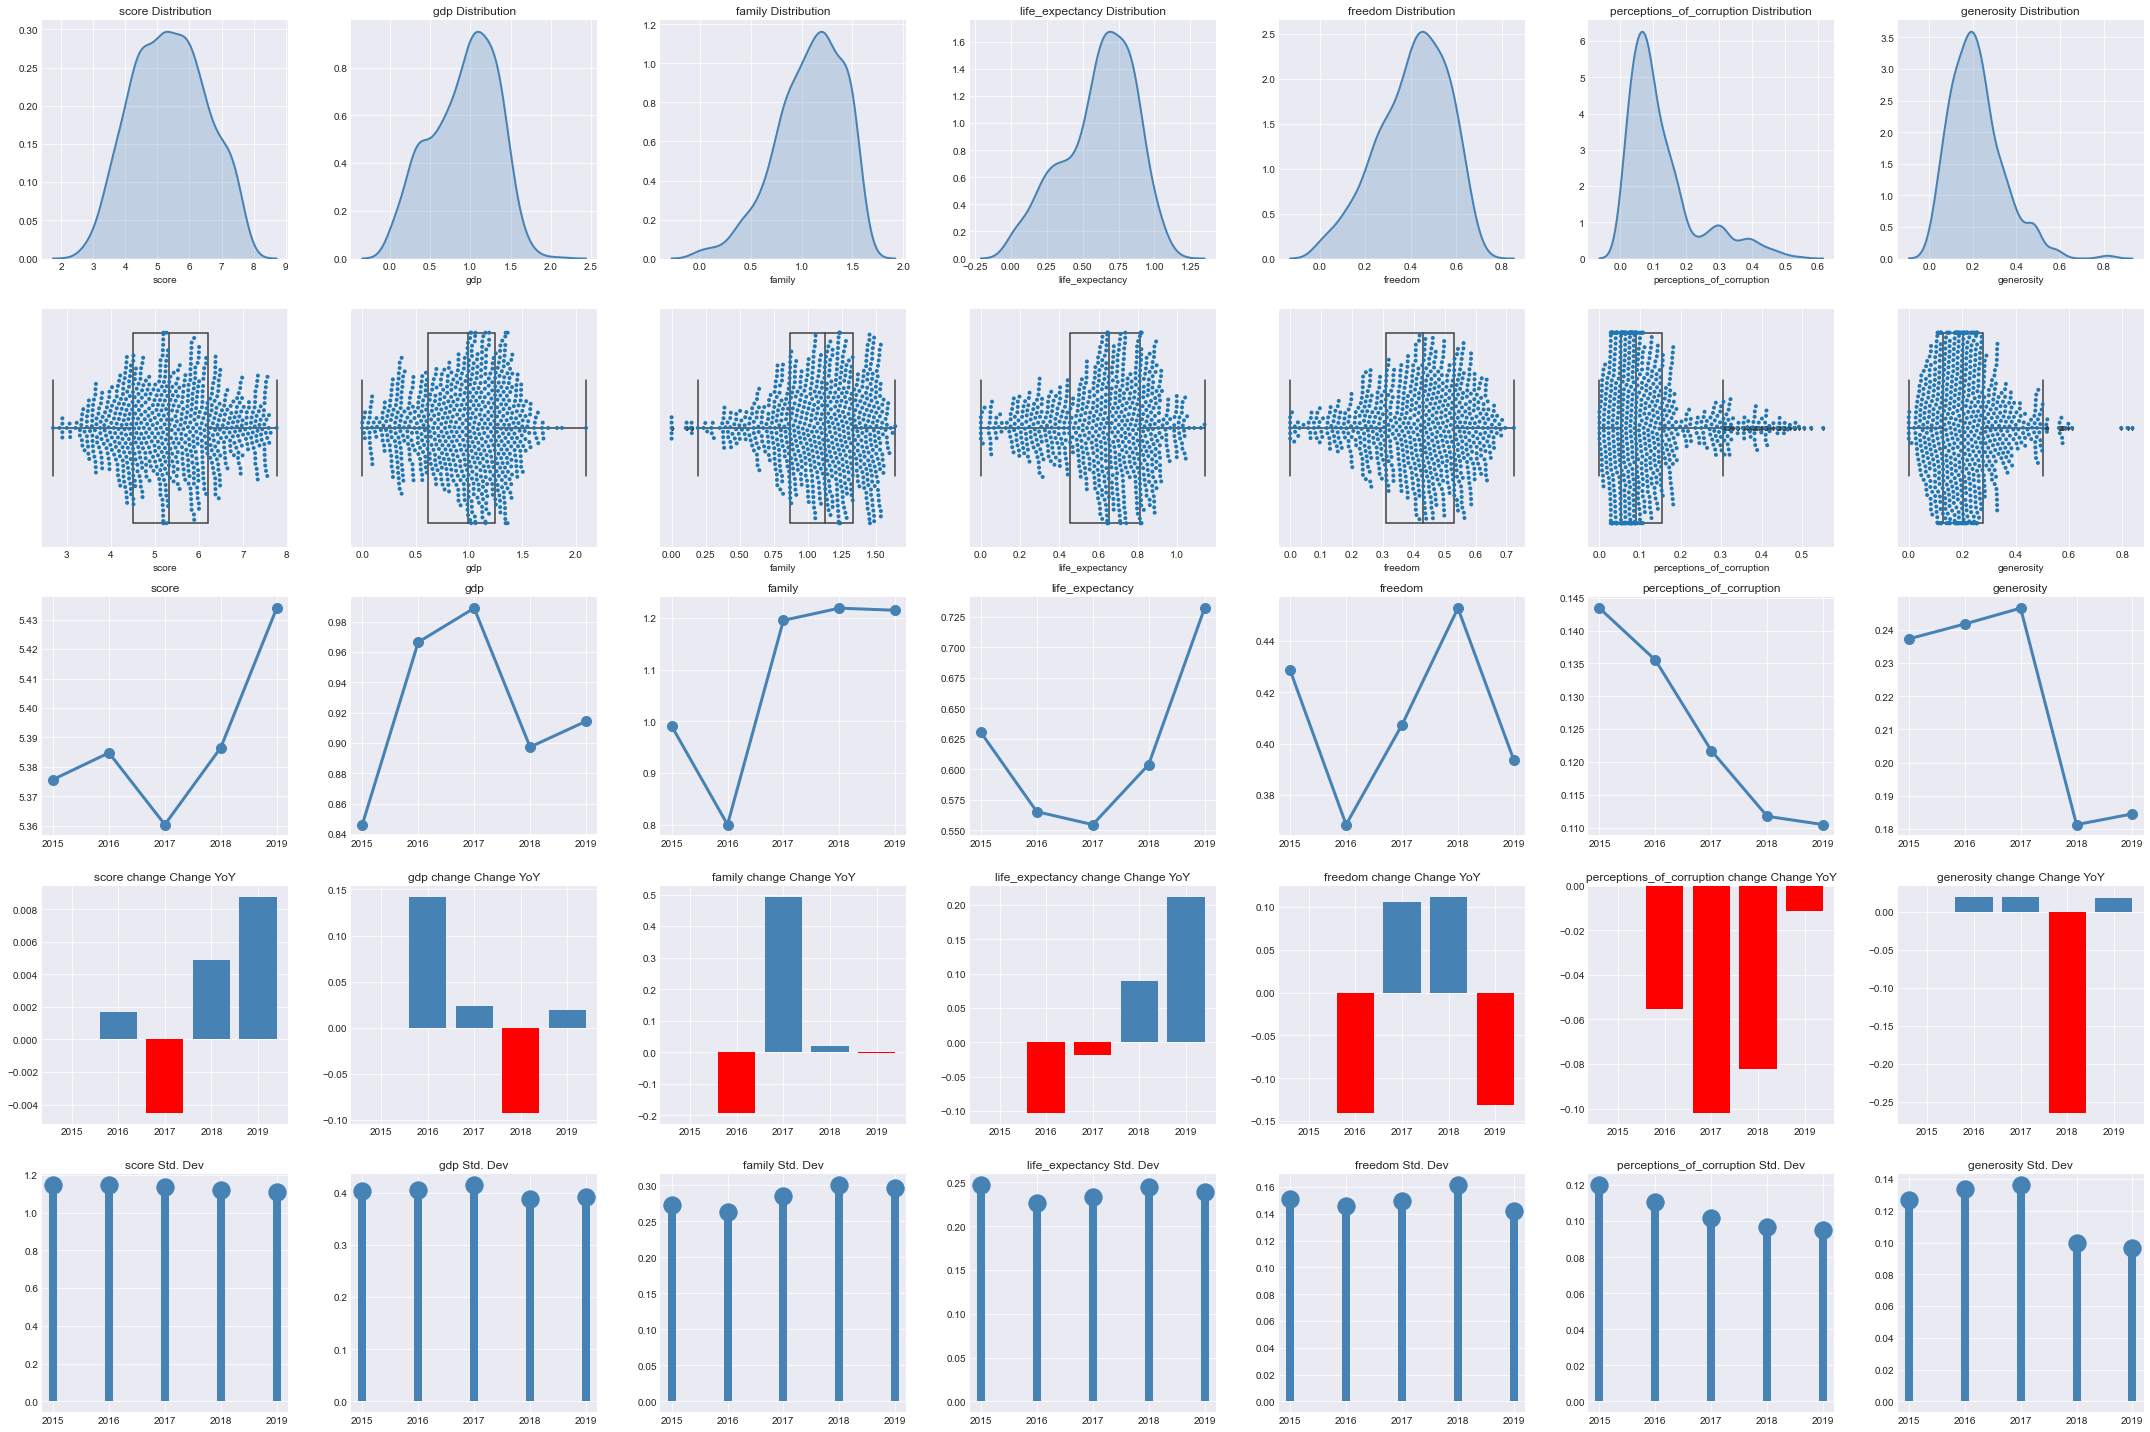

In [40]:
fig, ax = plt.subplots(5, 7, figsize = (30, 20))
for col in range(len(columns)):
    sns.distplot(df[columns[col]], hist = False, kde_kws = {"shade": True, "linewidth": 2}, color = "steelblue", ax = ax[0, col])
    sns.boxplot(df[columns[col]], fliersize = 3, boxprops = {'facecolor':'None'}, ax = ax[1, col])
    sns.swarmplot(df[columns[col]], size = 4, ax = ax[1, col])
    ax[0, col].set_title(columns[col] + " Distribution")
    ax[2, col].plot("year", columns[col], data = data_graph, marker = "o", ms = 10, lw = 3, color = "steelblue")
    ax[2, col].set_title(columns[col])

columns_chg = data_graph.columns[-7:]
for col in range(len(columns_chg)):
    ax[3, col].bar(x = "year", height = columns_chg[col], data = data_graph[data_graph[columns_chg[col]] >= 0], color = "steelblue")
    ax[3, col].bar(x = "year", height = columns_chg[col], data = data_graph[data_graph[columns_chg[col]] < 0], color = "red")
    ax[3, col].set_title(columns_chg[col] + " Change YoY")
    
data_graph = df.groupby("year").std().reset_index()
for col in range(len(columns)):
    ax[4, col].vlines(x = "year", ymin = 0, ymax = columns[col], colors = "steelblue", data = data_graph, lw = 8)
    ax[4, col].scatter("year", columns[col], data = data_graph, color = "steelblue", s = 300)
    ax[4, col].set_title(columns[col] + " Std. Dev")
plt.tight_layout()
plt.show()
fig.savefig('data_world_happiness.png')

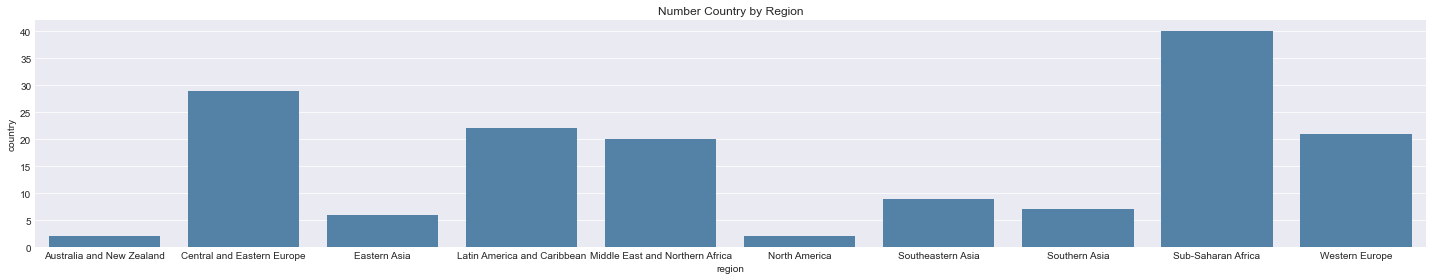

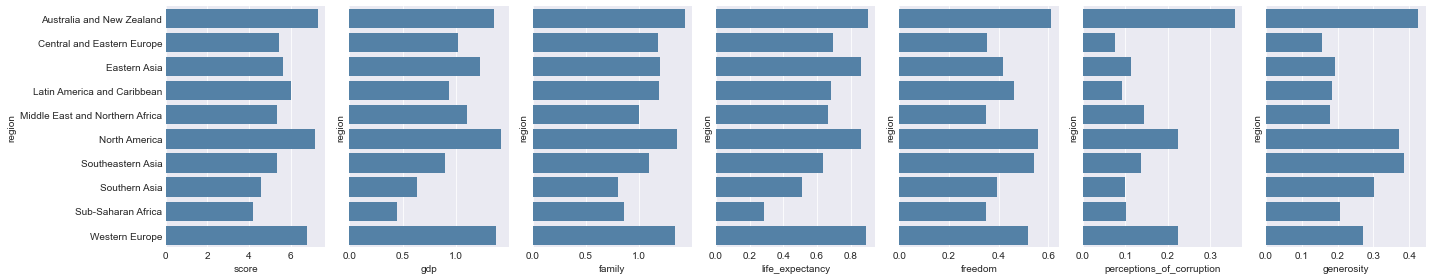

In [41]:
plt.figure(figsize = (20, 4))
sns.barplot(x = "region", y = "country",
            data = df.groupby(["region"]).nunique().drop("region", axis = 1).reset_index(),
            color = "steelblue")
plt.title("Number Country by Region")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 7, figsize = (20, 4))
columns = df.columns[2:9]
for col in range(len(columns)):
    sns.barplot(x = columns[col], y = "region", data = df.groupby("region").mean().reset_index().sort_values("region"), color = "steelblue", ax = ax[col])
    if col >= 1:
        ax[col].set_yticks([])
plt.tight_layout()
plt.show()

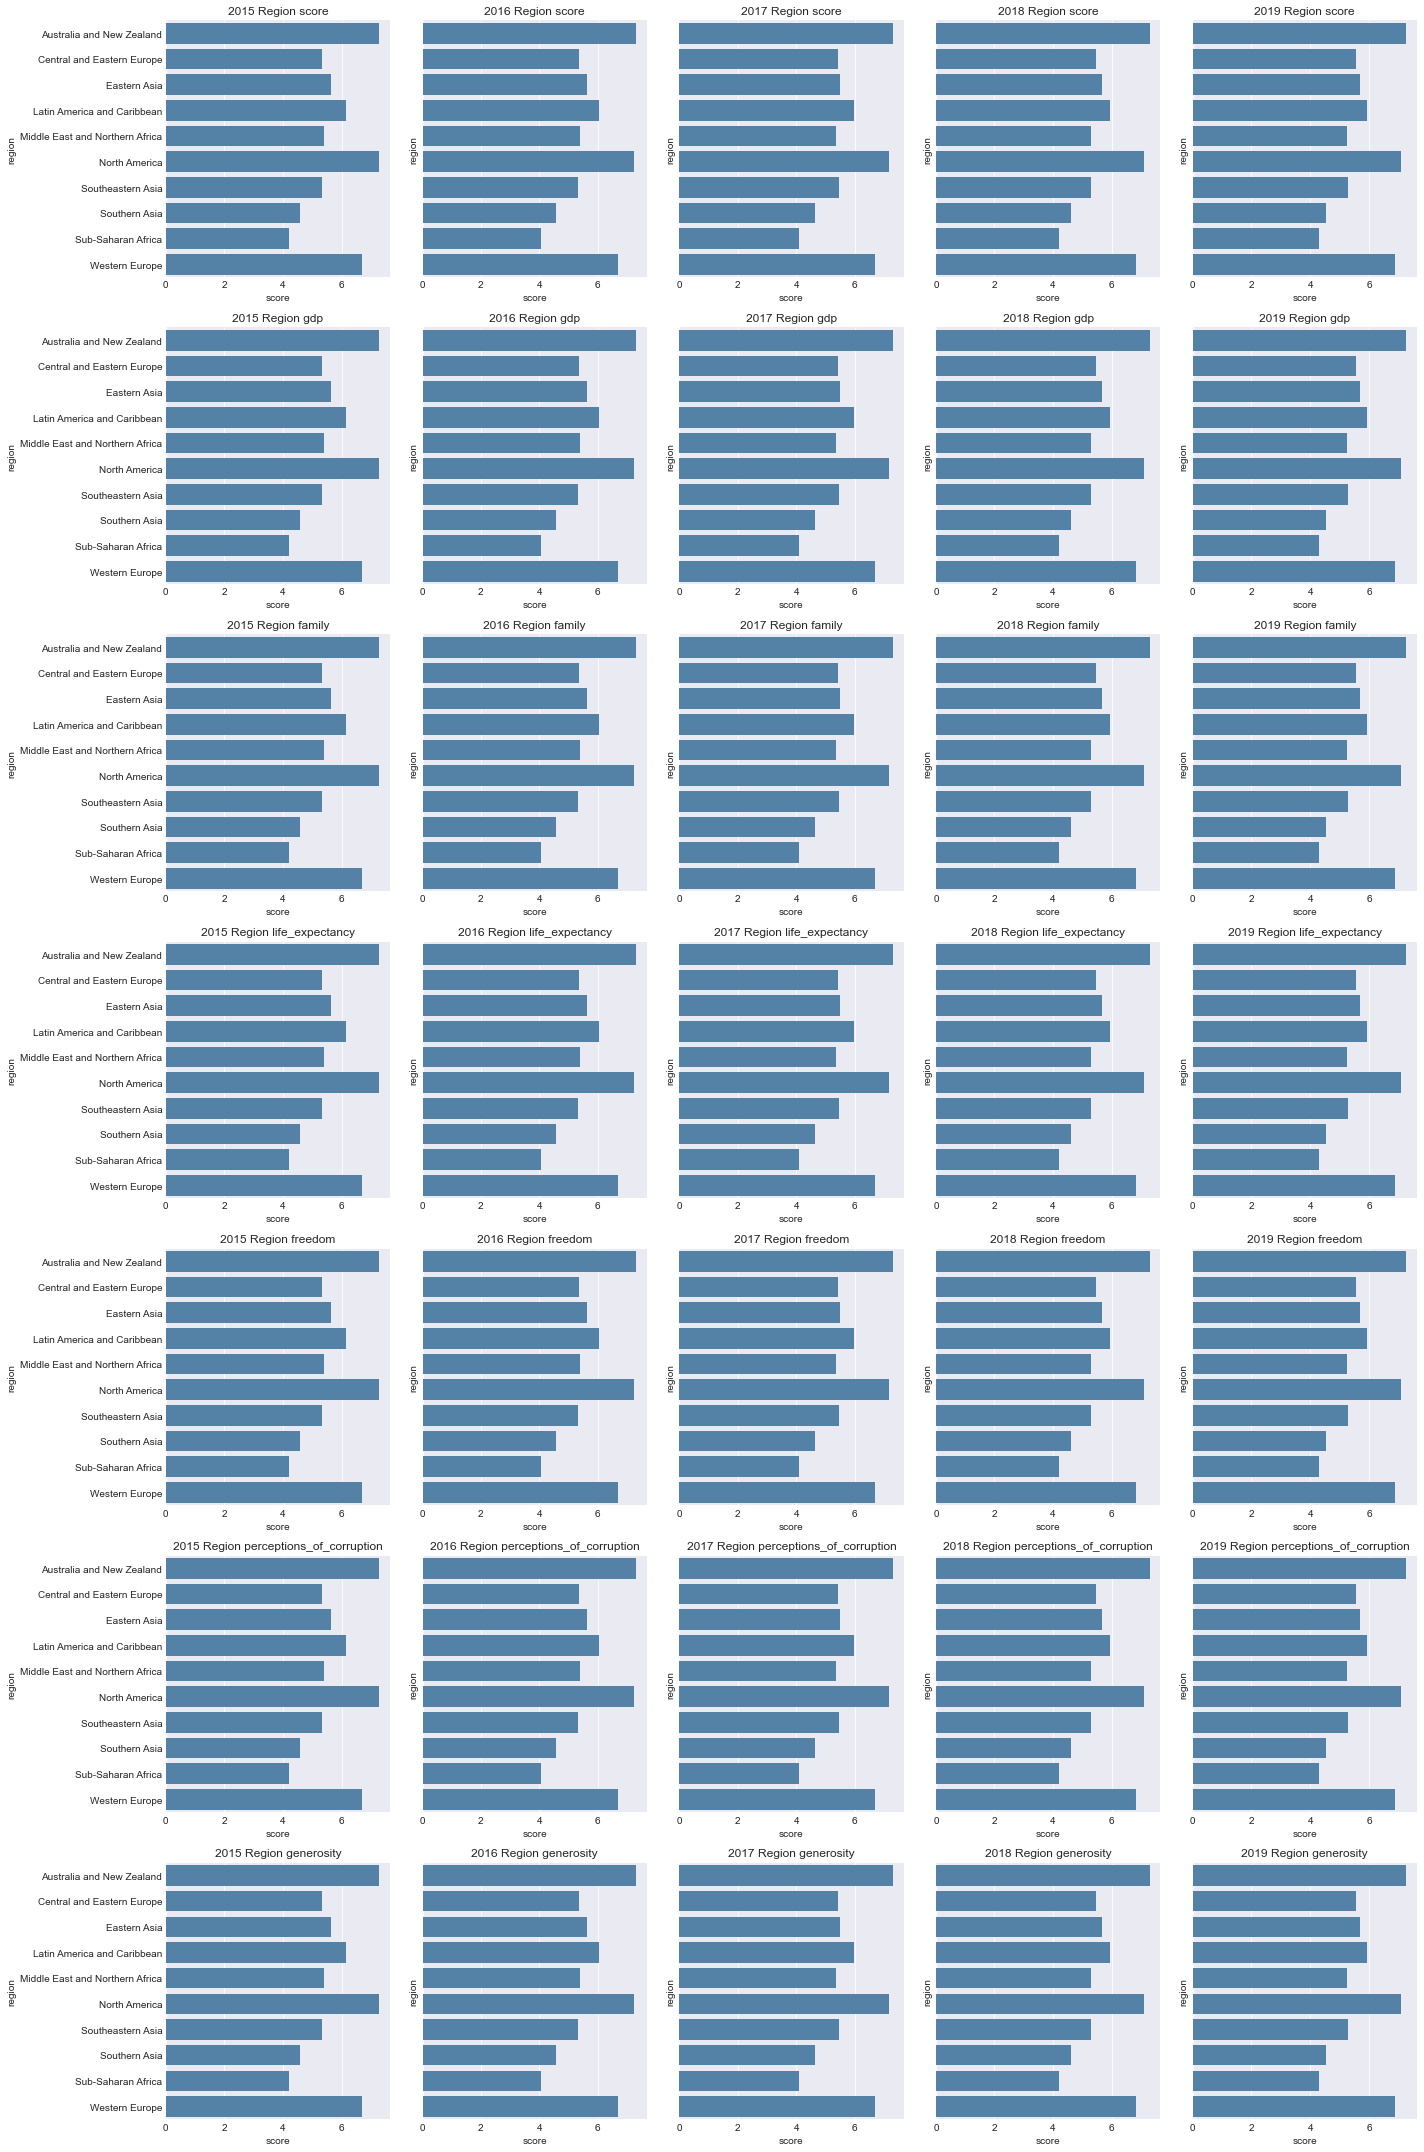

In [42]:
fig, ax = plt.subplots(7, 5, figsize = (20, 30))
years = df["year"].unique()
rows = df.columns[2:9]
for row in range(len(rows)):
    for year in range(len(years)):
        sns.barplot(x = "score", y = "region",
                    data = df[df["year"] == years[year]].groupby(["region", "year"]).mean().reset_index(), color = "steelblue", ax = ax[row, year])
        if year >= 1:
            ax[row, year].set_yticks([])
        ax[row, year].set_title(str(years[year]) + " Region " + rows[row])
plt.tight_layout()
plt.show()

In [43]:
def make_graph_by_region(region):
    print("=============================================================== " + region + " ===============================================================")
    data_graph = df[df["region"] == region].groupby("year").mean().reset_index()
    columns = data_graph.columns[2:]
    for col in columns:
        data_graph[str(col) + " change"] = data_graph[col].pct_change()
        data_graph[str(col) + " change"].fillna(0, inplace = True)

    fig, ax = plt.subplots(3, 7, figsize = (30, 12))
    for col in range(len(columns)):
        ax[0, col].plot("year", columns[col], data = data_graph, marker = "o", ms = 10, lw = 3, color = "steelblue")
        ax[0, col].set_title(columns[col])

    columns_chg = data_graph.columns[-7:]
    for col in range(len(columns_chg)):
        ax[1, col].bar(x = "year", height = columns_chg[col], data = data_graph[data_graph[columns_chg[col]] >= 0], color = "steelblue")
        ax[1, col].bar(x = "year", height = columns_chg[col], data = data_graph[data_graph[columns_chg[col]] < 0], color = "red")
        ax[1, col].set_title(columns_chg[col] + " Change YoY")

    data_graph = df[df["region"] == region].groupby("year").std().reset_index()
    for col in range(len(columns)):
        ax[2, col].vlines(x = "year", ymin = 0, ymax = columns[col], colors = "steelblue", data = data_graph, lw = 8)
        ax[2, col].scatter("year", columns[col], data = data_graph, color = "steelblue", s = 300)
        ax[2, col].set_title(columns[col] + " Std. Dev")
    plt.tight_layout()
    plt.show()

=============================================================== Western Europe ===============================================================


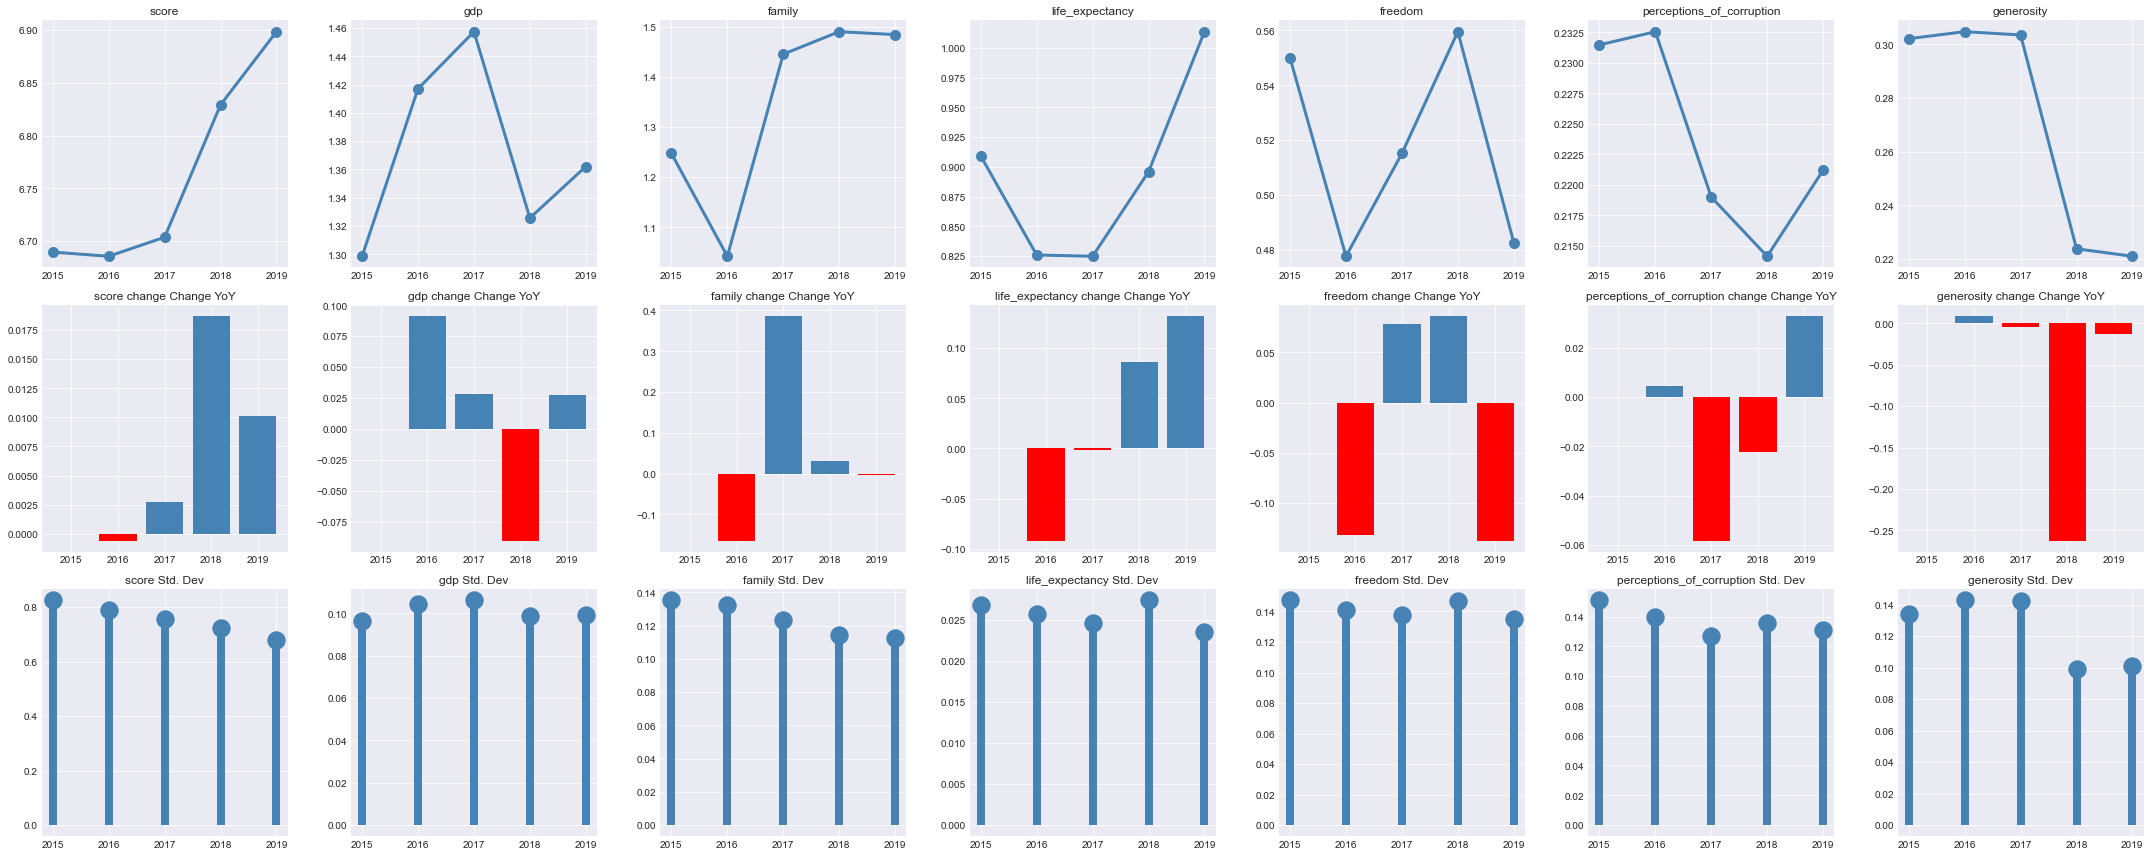

=============================================================== North America ===============================================================


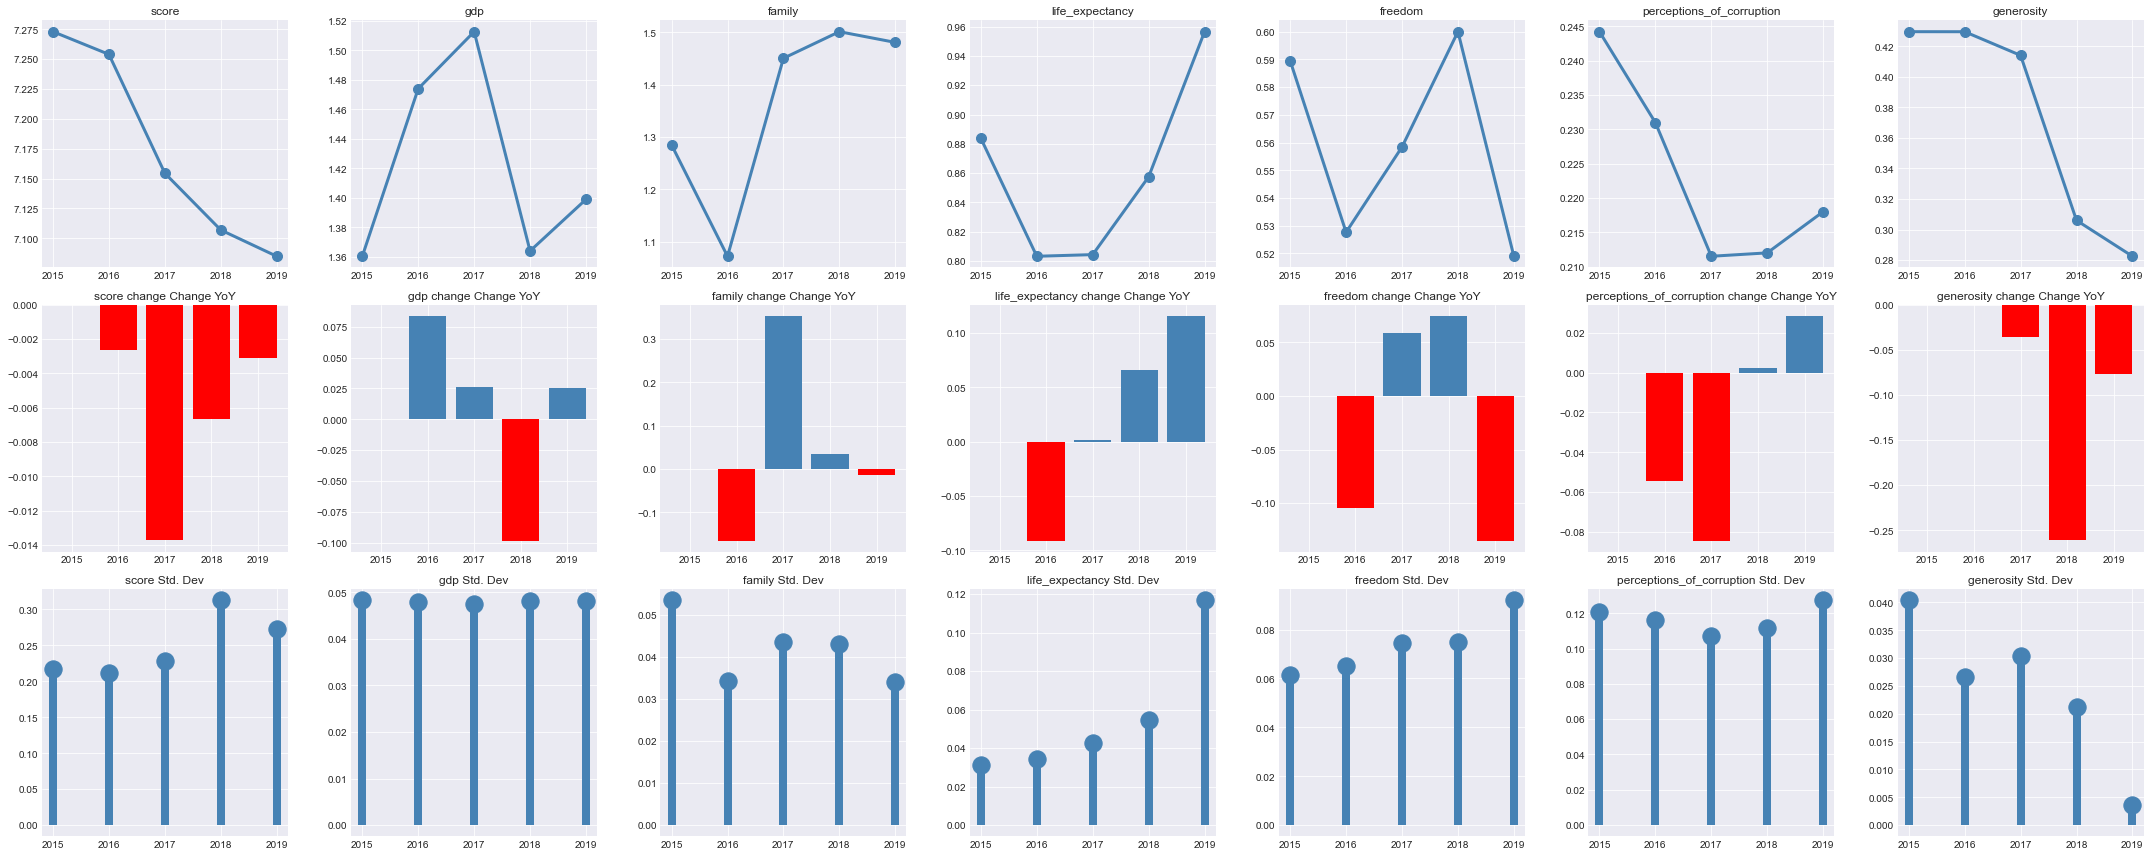

=============================================================== Australia and New Zealand ===============================================================


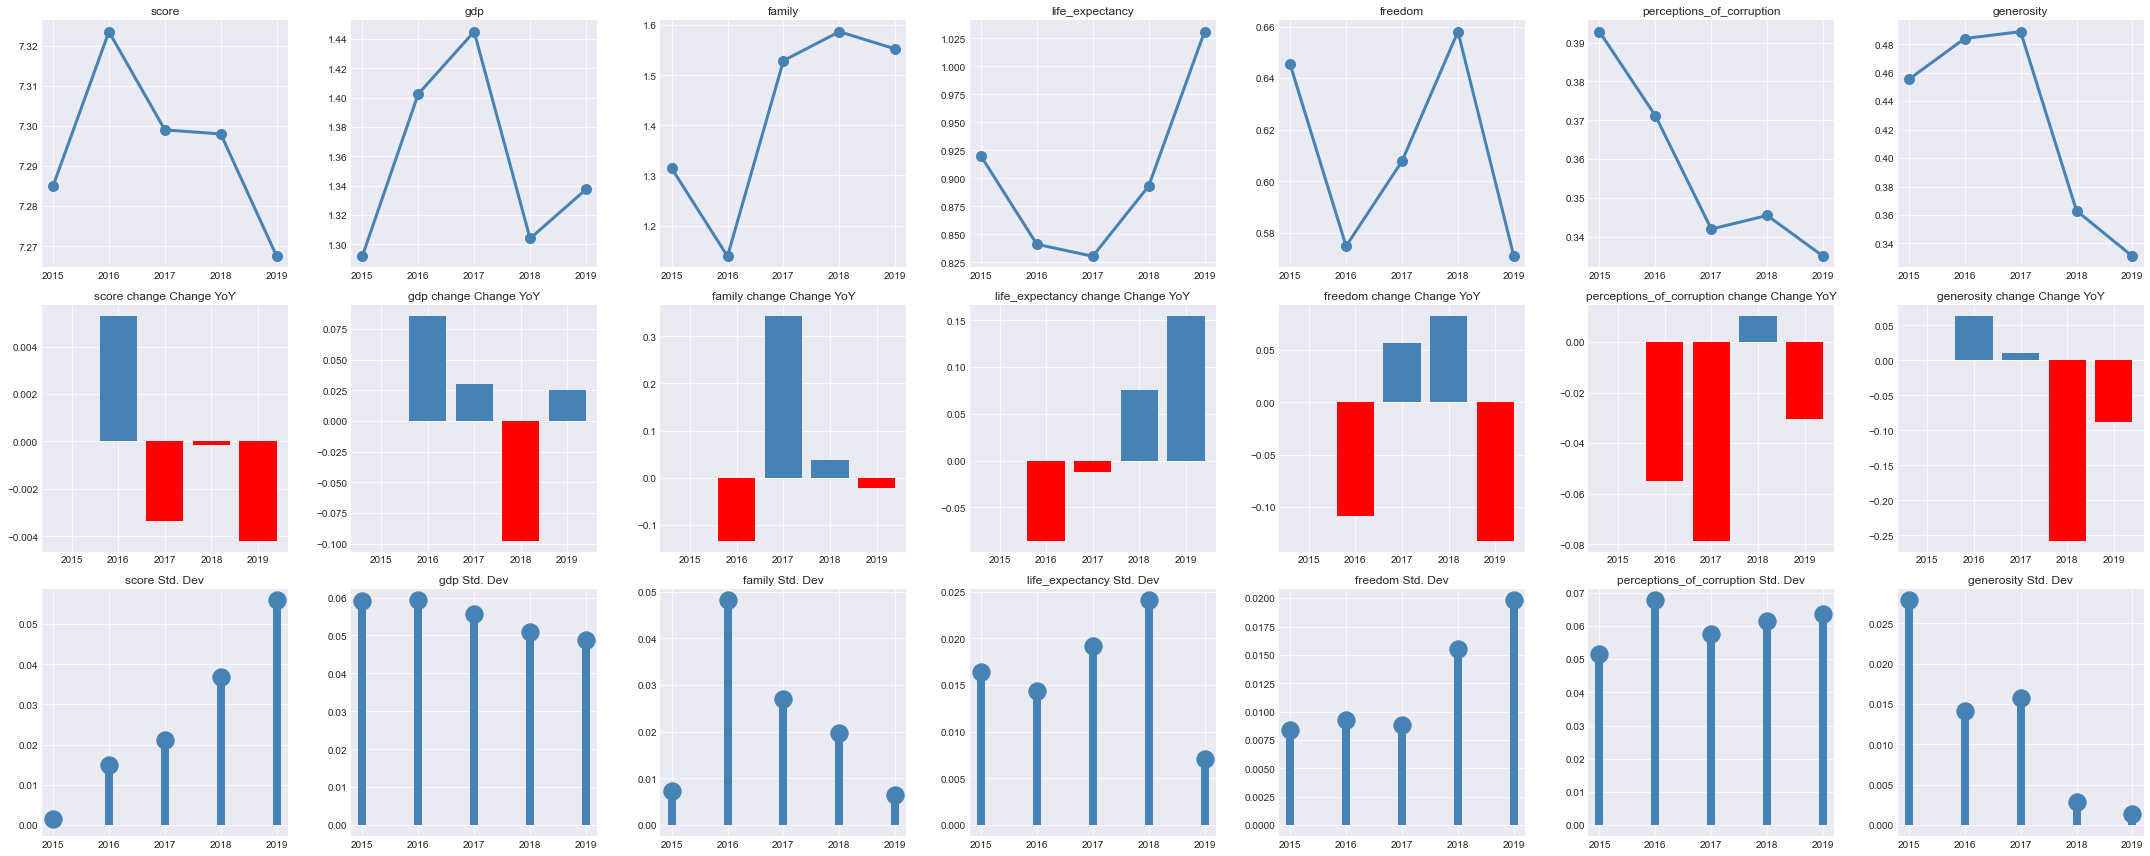

=============================================================== Middle East and Northern Africa ===============================================================


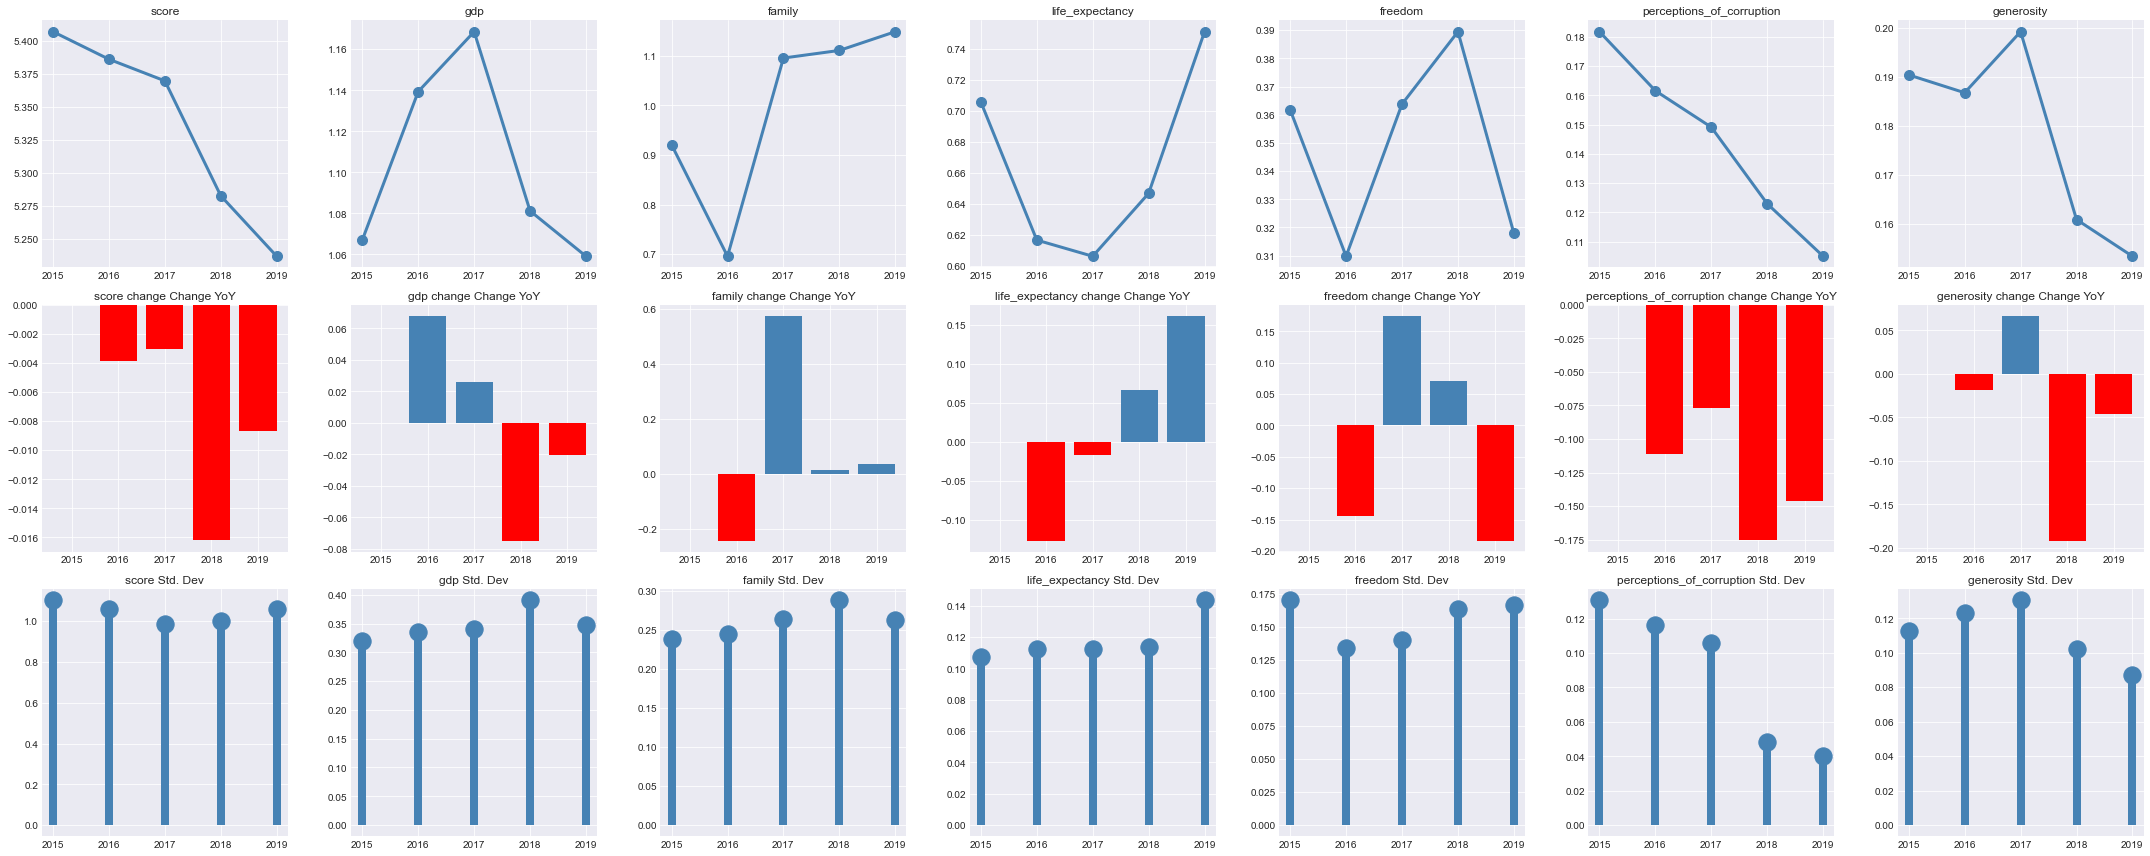

=============================================================== Latin America and Caribbean ===============================================================


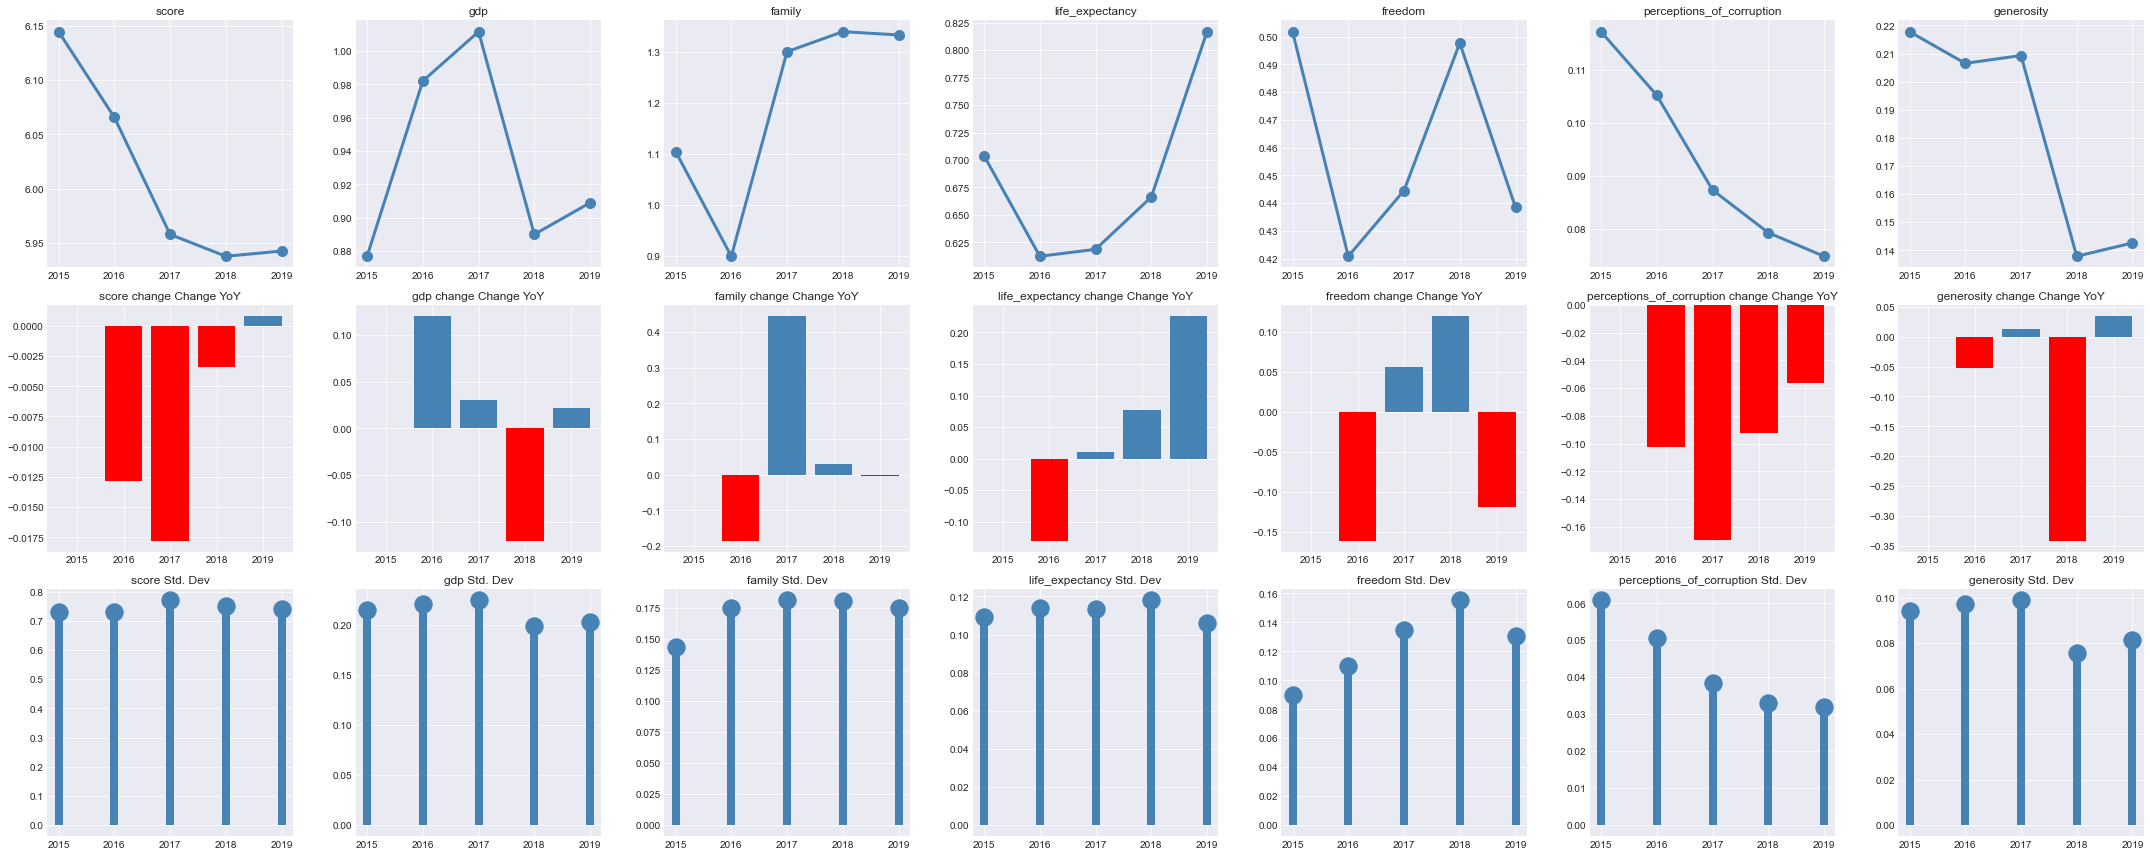

=============================================================== Southeastern Asia ===============================================================


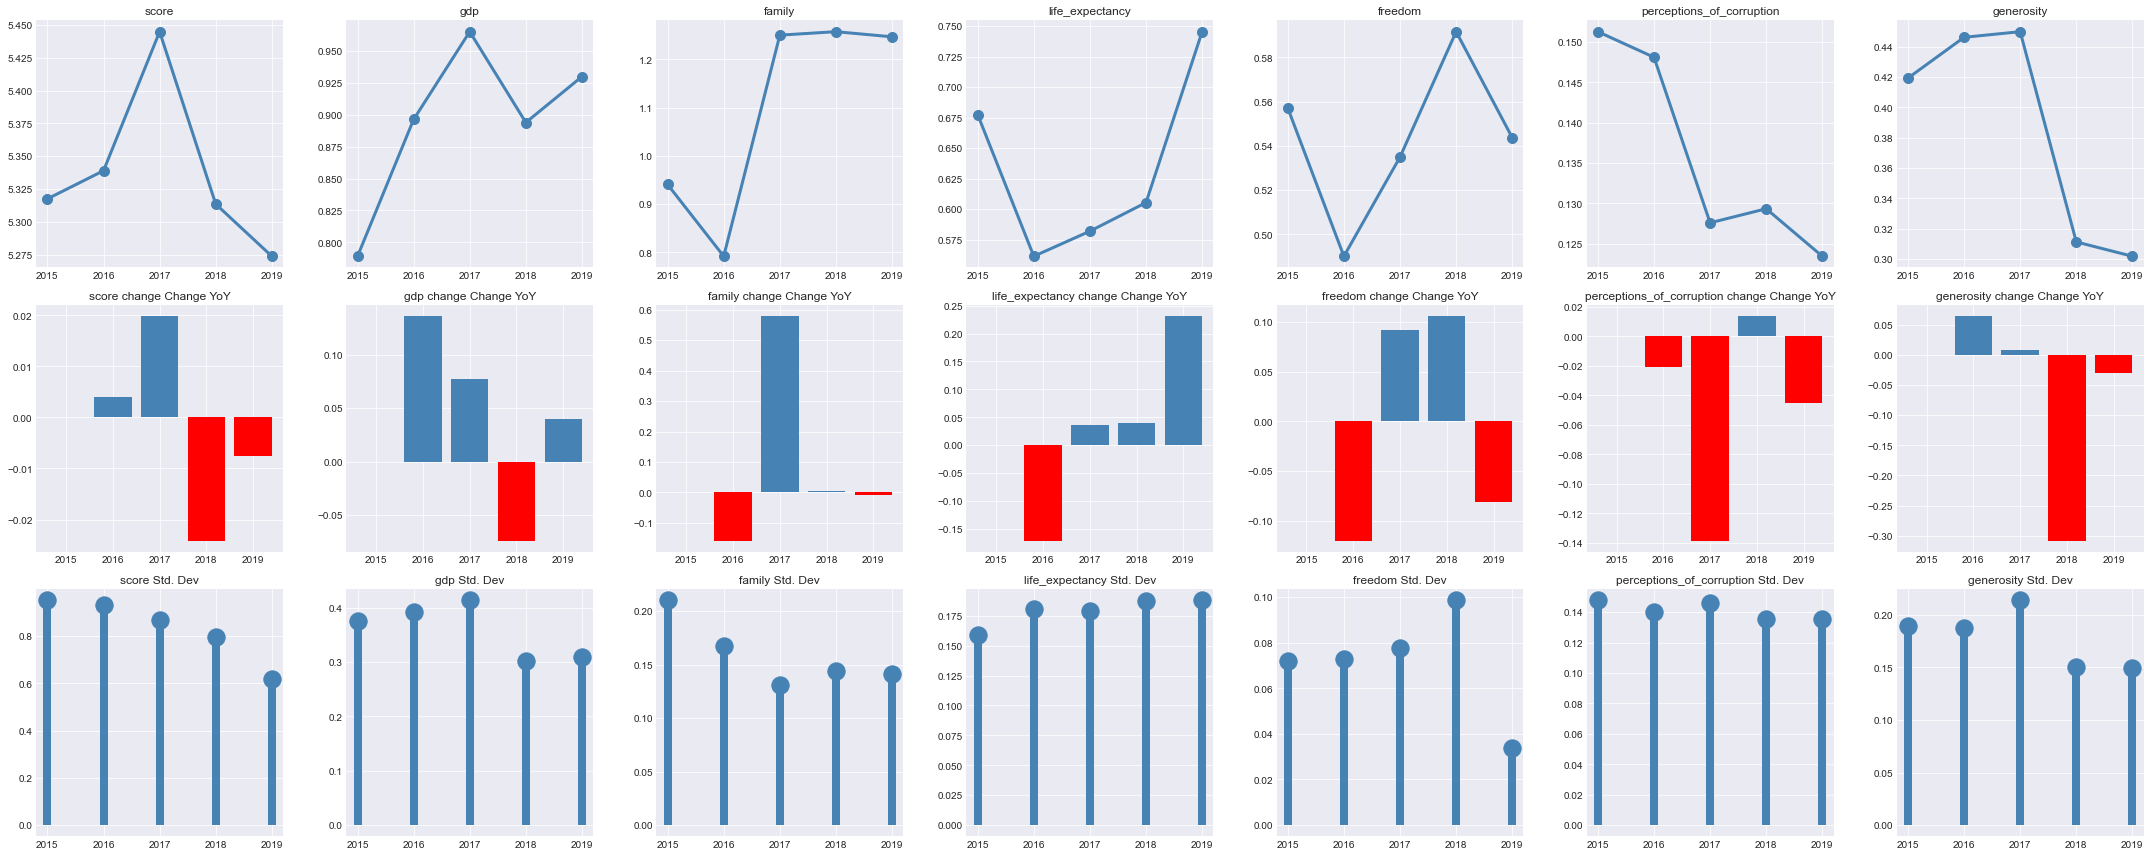

=============================================================== Central and Eastern Europe ===============================================================


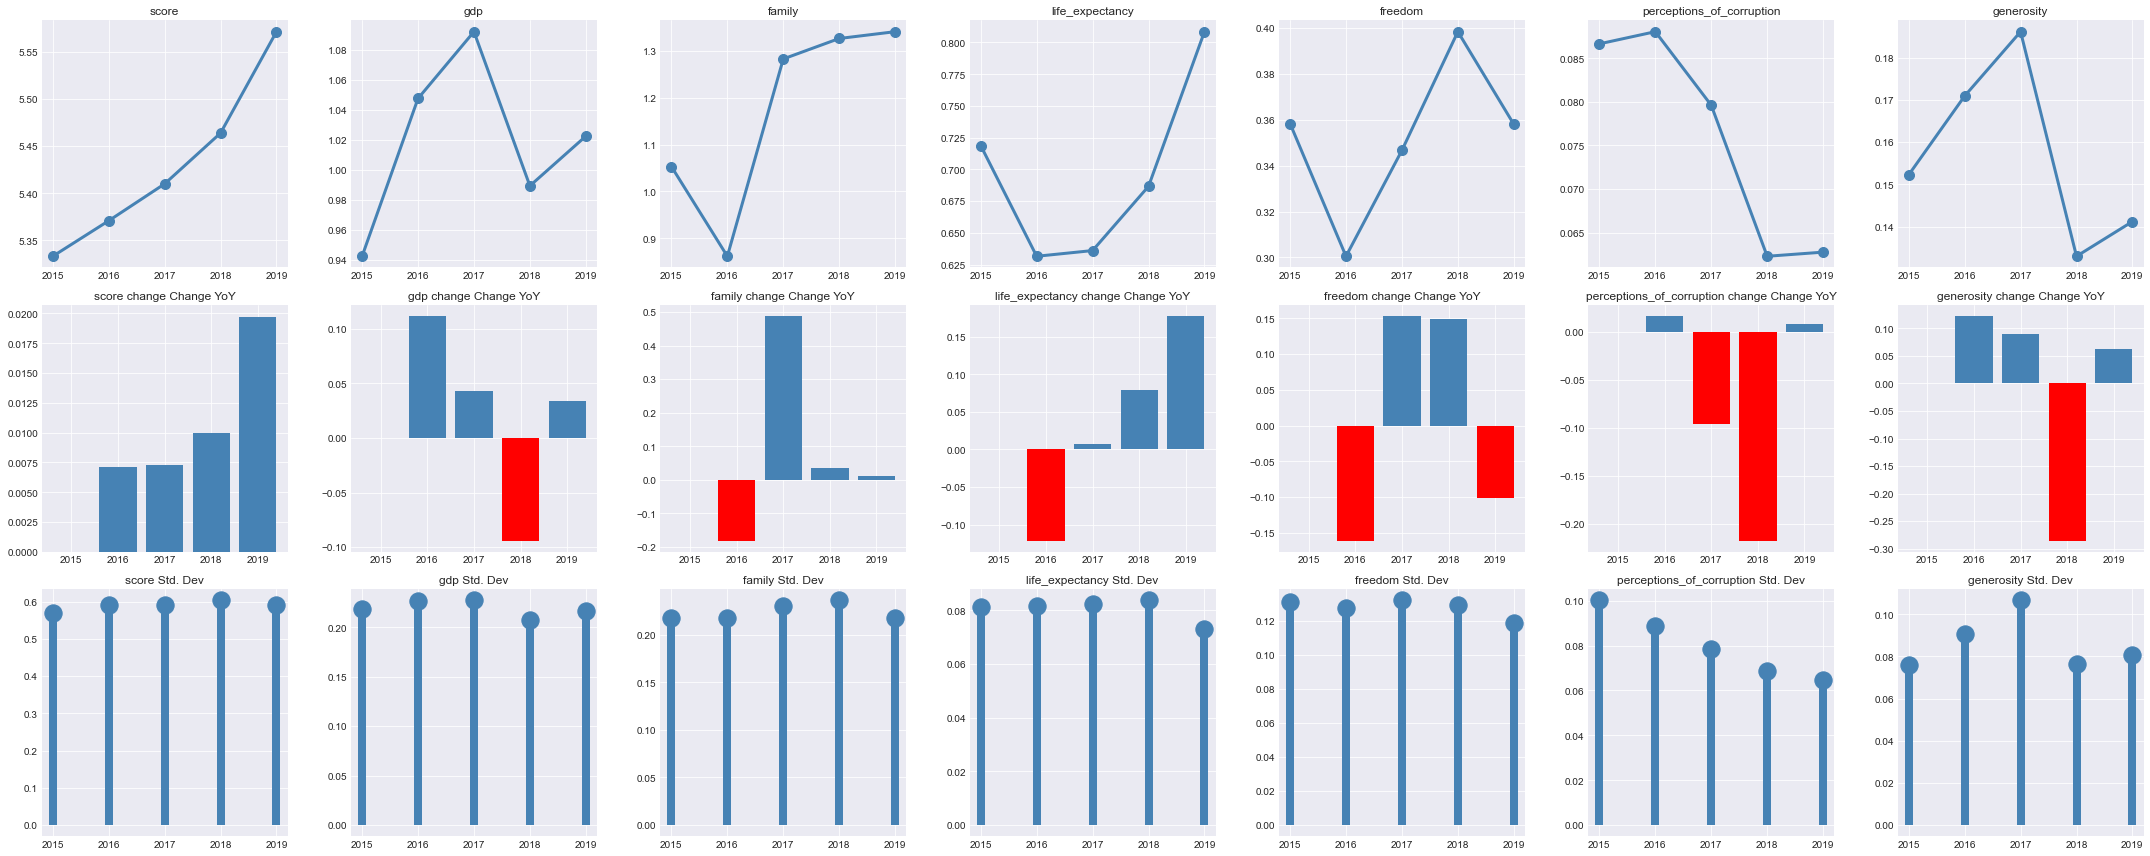

=============================================================== Eastern Asia ===============================================================


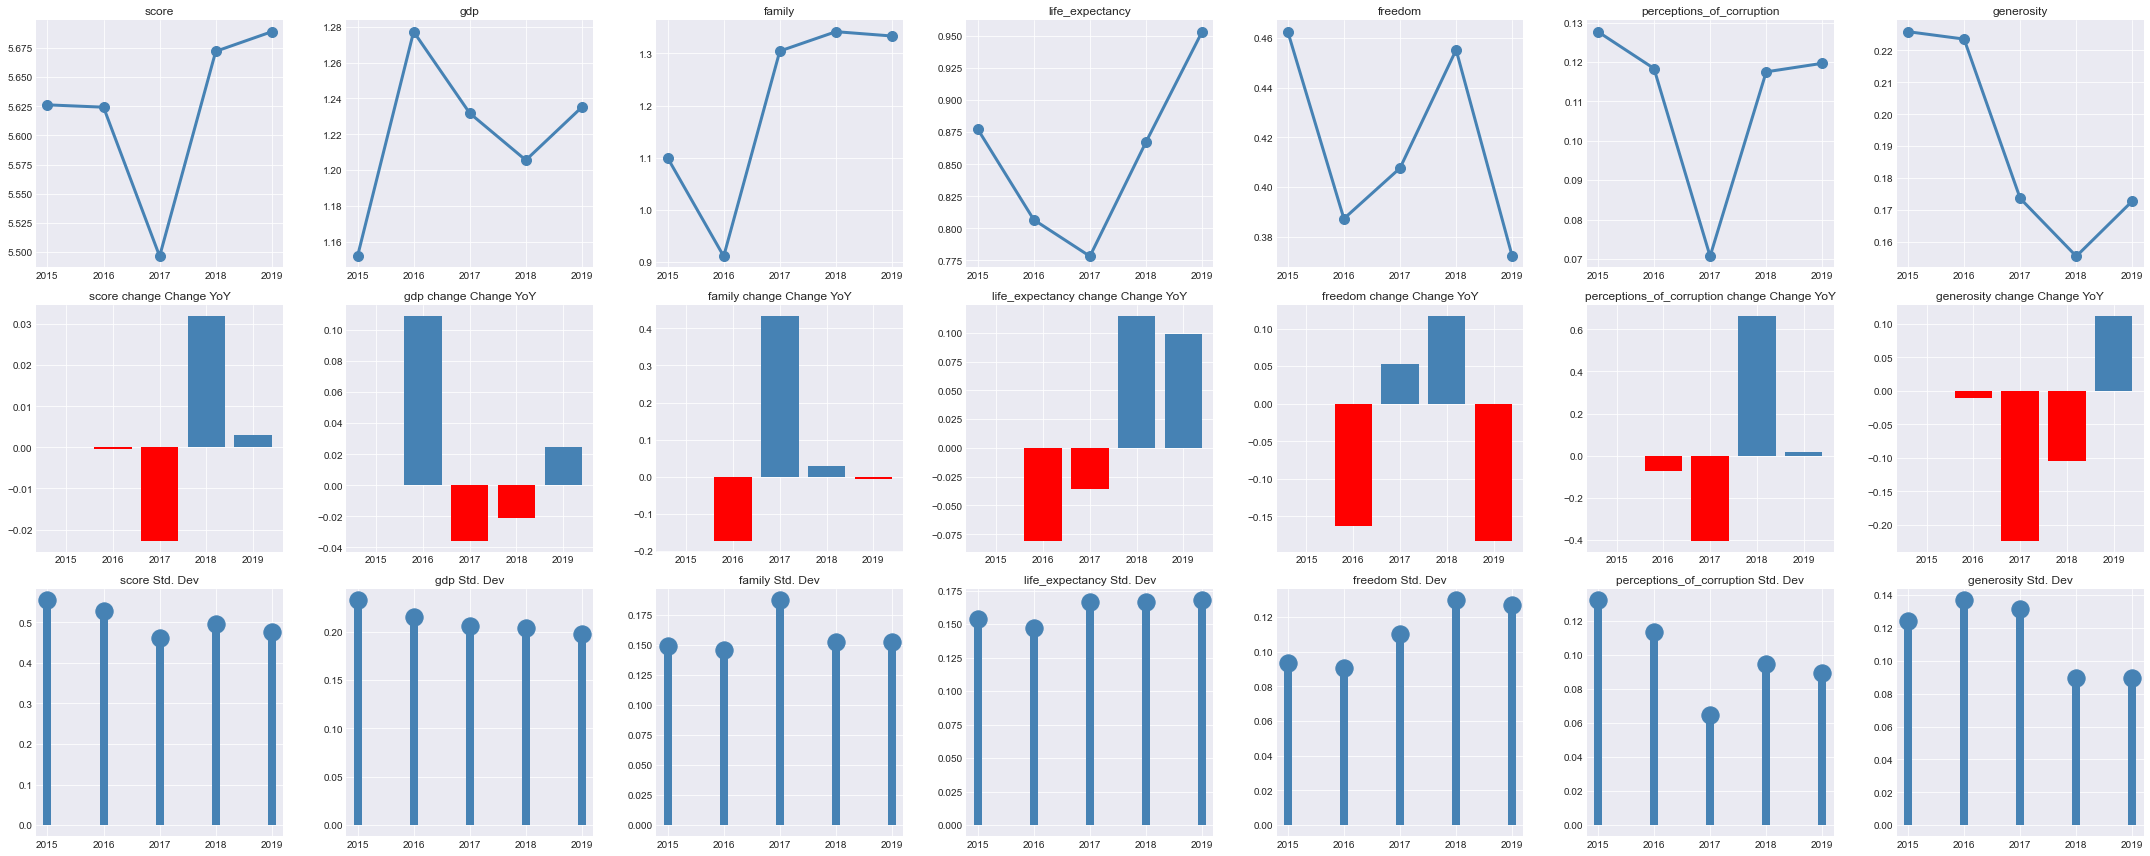

=============================================================== Sub-Saharan Africa ===============================================================


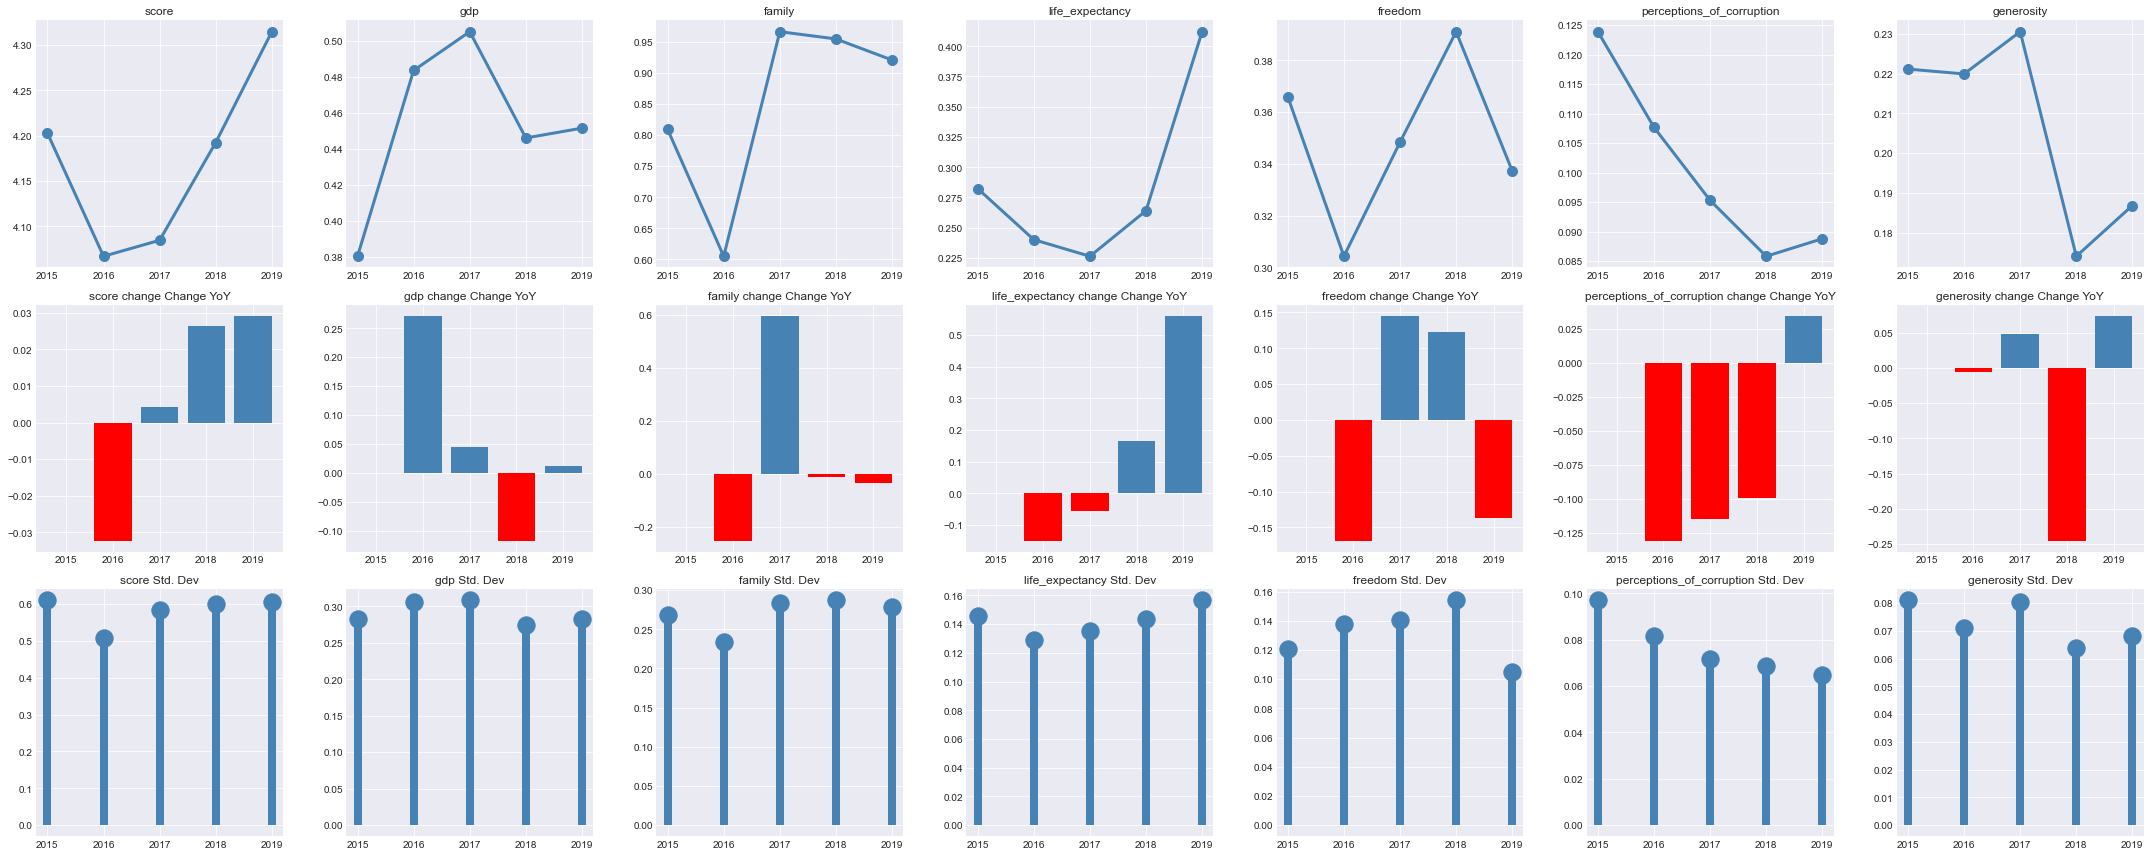

=============================================================== Southern Asia ===============================================================


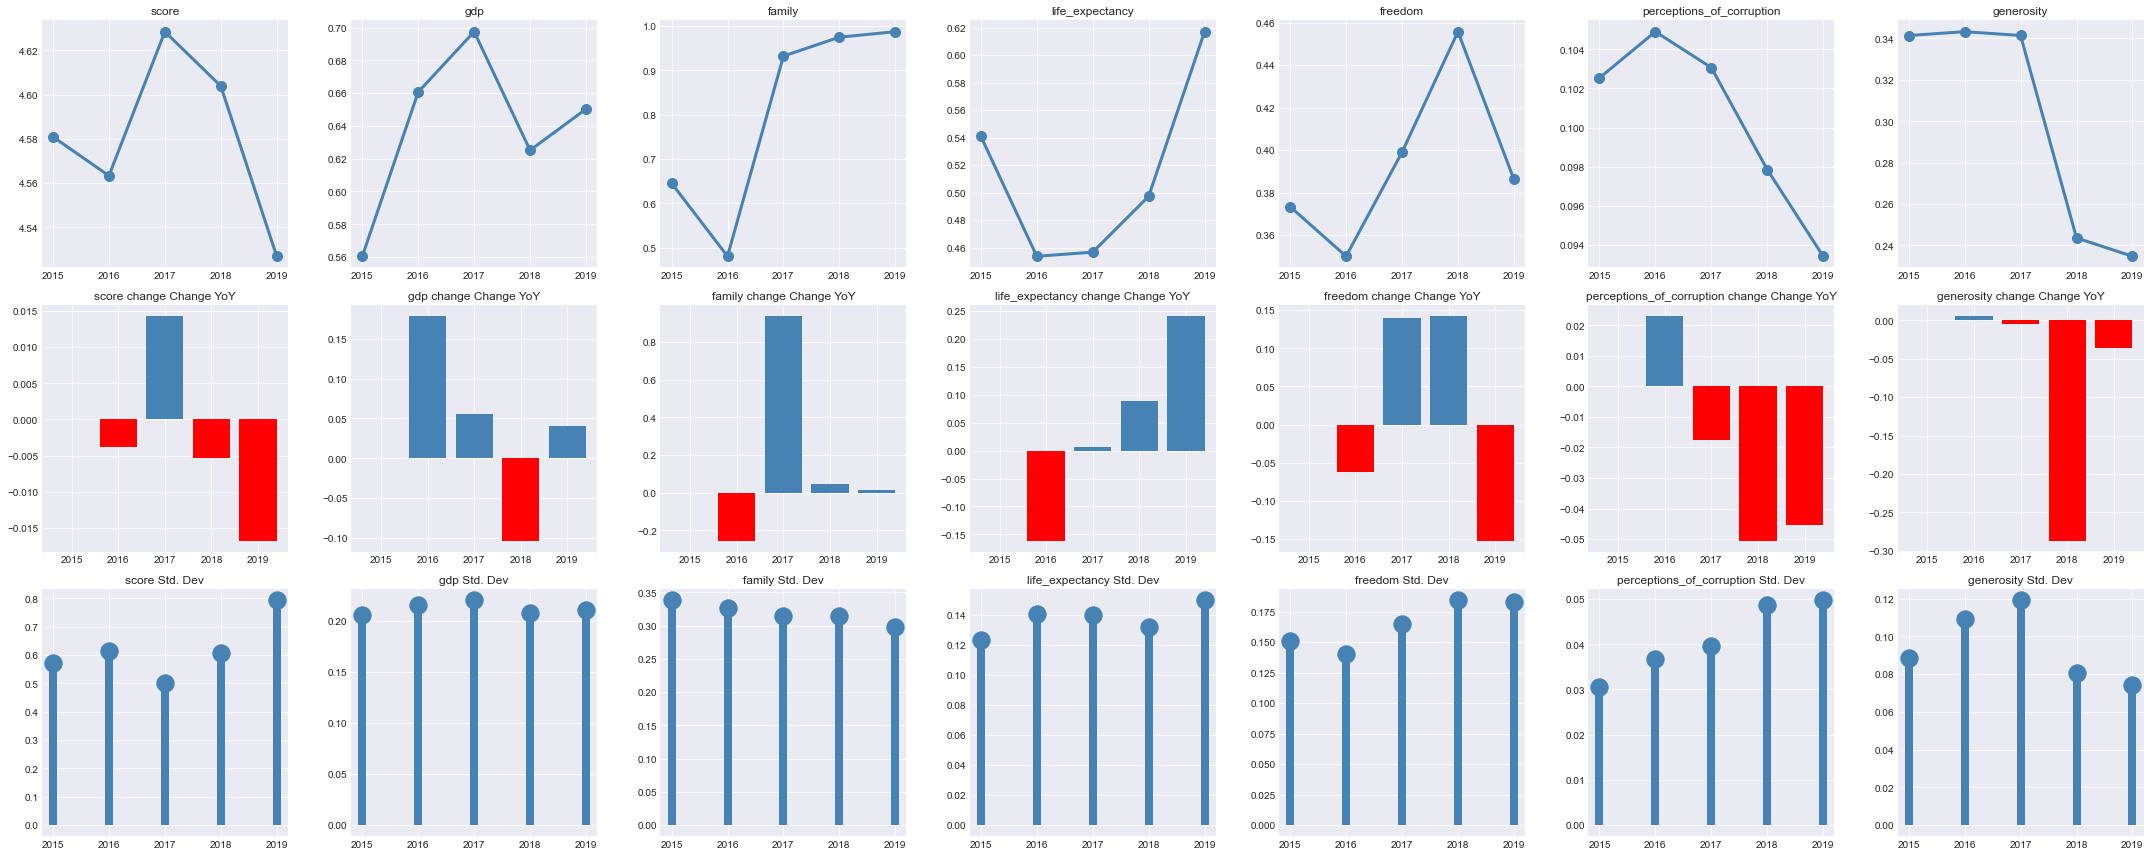

In [44]:
regions = df["region"].unique()
for region in regions:
    make_graph_by_region(region)

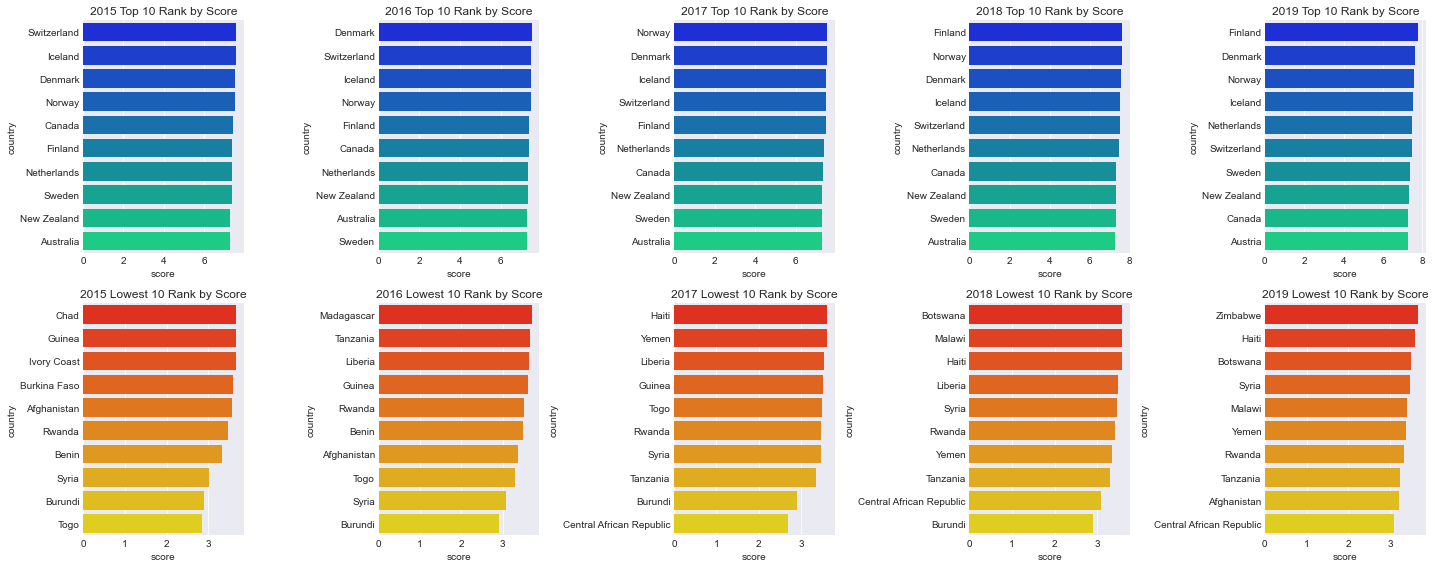

In [45]:
fig, ax = plt.subplots(2, 5, figsize = (20, 8))
years = df["year"].unique()
for year in range(len(years)):
    sns.barplot(x = "score", y = "country",
                data = df[df["year"] == years[year]].sort_values("score", ascending = False).head(10), palette = "winter", ax = ax[0, year])
    ax[0, year].set_title(str(years[year]) + " Top 10 Rank by Score")
    sns.barplot(x = "score", y = "country",
                data = df[df["year"] == years[year]].sort_values("score", ascending = False).tail(10), palette = "autumn", ax = ax[1, year])
    ax[1, year].set_title(str(years[year]) + " Lowest 10 Rank by Score")
plt.tight_layout()
plt.show()

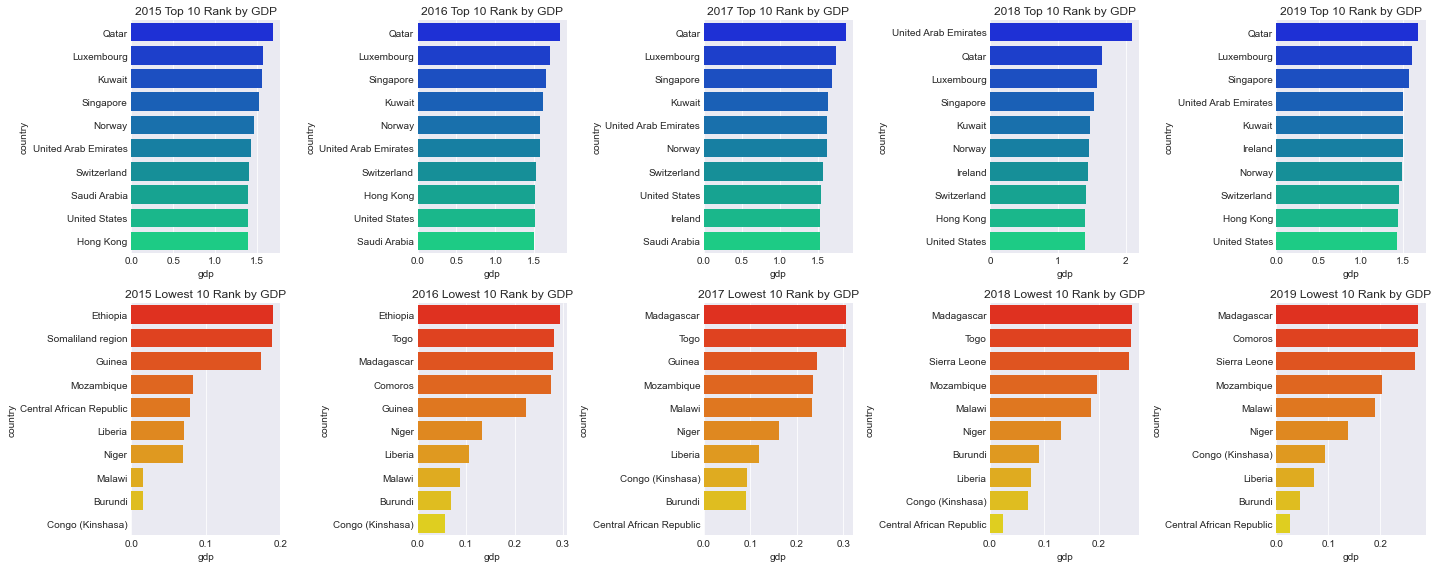

In [46]:
fig, ax = plt.subplots(2, 5, figsize = (20, 8))
years = df["year"].unique()
for year in range(len(years)):
    sns.barplot(x = "gdp", y = "country",
                data = df[df["year"] == years[year]].sort_values("gdp", ascending = False).head(10), palette = "winter", ax = ax[0, year])
    ax[0, year].set_title(str(years[year]) + " Top 10 Rank by GDP")
    sns.barplot(x = "gdp", y = "country",
                data = df[df["year"] == years[year]].sort_values("gdp", ascending = False).tail(10), palette = "autumn", ax = ax[1, year])
    ax[1, year].set_title(str(years[year]) + " Lowest 10 Rank by GDP")
plt.tight_layout()
plt.show()

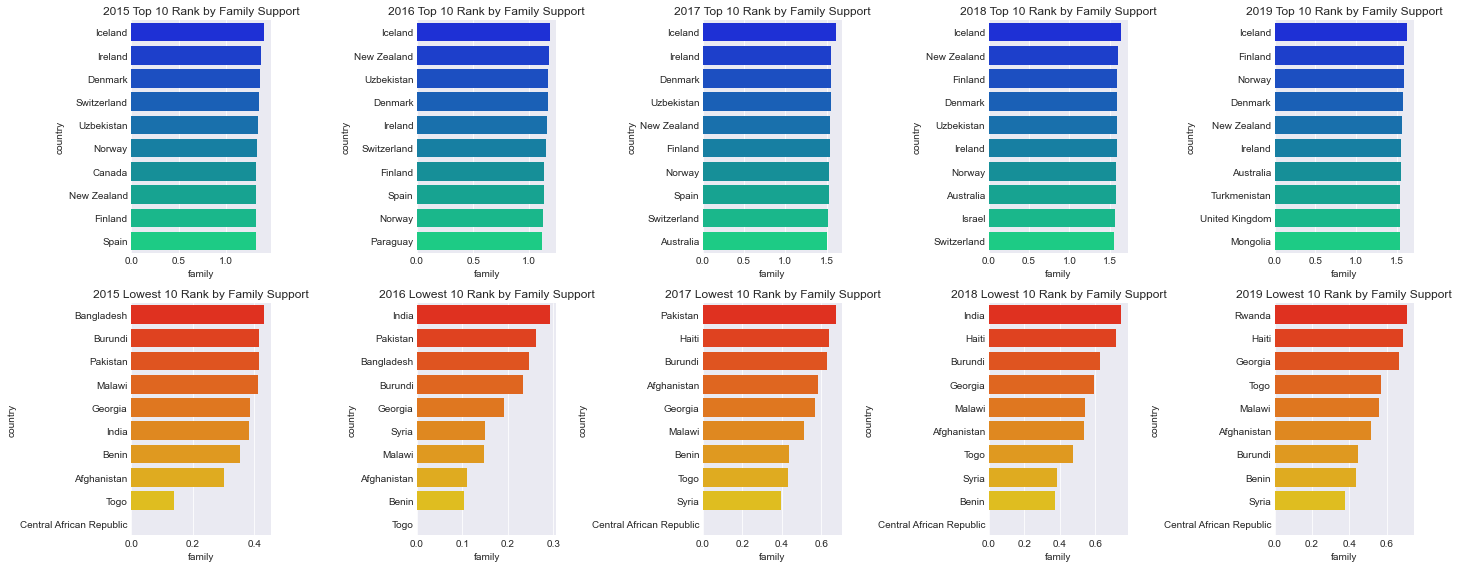

In [47]:
fig, ax = plt.subplots(2, 5, figsize = (20, 8))
years = df["year"].unique()
for year in range(len(years)):
    sns.barplot(x = "family", y = "country",
                data = df[df["year"] == years[year]].sort_values("family", ascending = False).head(10), palette = "winter", ax = ax[0, year])
    ax[0, year].set_title(str(years[year]) + " Top 10 Rank by Family Support")
    sns.barplot(x = "family", y = "country",
                data = df[df["year"] == years[year]].sort_values("family", ascending = False).tail(10), palette = "autumn", ax = ax[1, year])
    ax[1, year].set_title(str(years[year]) + " Lowest 10 Rank by Family Support")
plt.tight_layout()
plt.show()

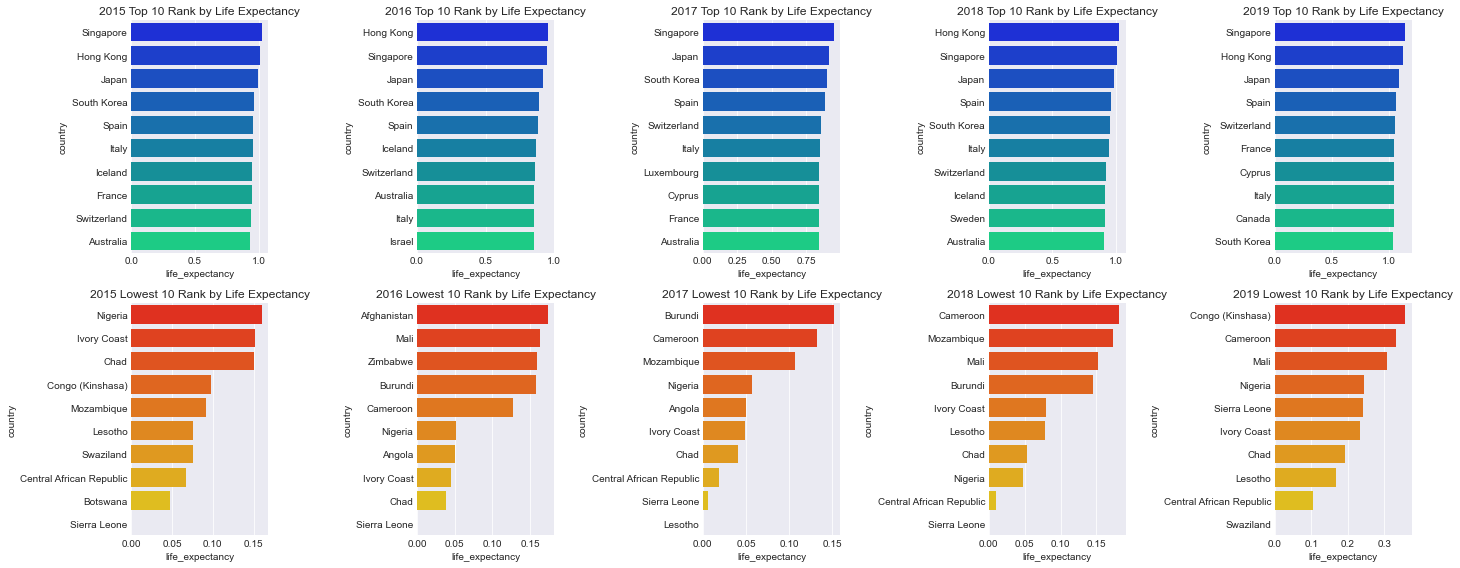

In [48]:
fig, ax = plt.subplots(2, 5, figsize = (20, 8))
years = df["year"].unique()
for year in range(len(years)):
    sns.barplot(x = "life_expectancy", y = "country",
                data = df[df["year"] == years[year]].sort_values("life_expectancy", ascending = False).head(10), palette = "winter", ax = ax[0, year])
    ax[0, year].set_title(str(years[year]) + " Top 10 Rank by Life Expectancy")
    sns.barplot(x = "life_expectancy", y = "country",
                data = df[df["year"] == years[year]].sort_values("life_expectancy", ascending = False).tail(10), palette = "autumn", ax = ax[1, year])
    ax[1, year].set_title(str(years[year]) + " Lowest 10 Rank by Life Expectancy")
plt.tight_layout()
plt.show()

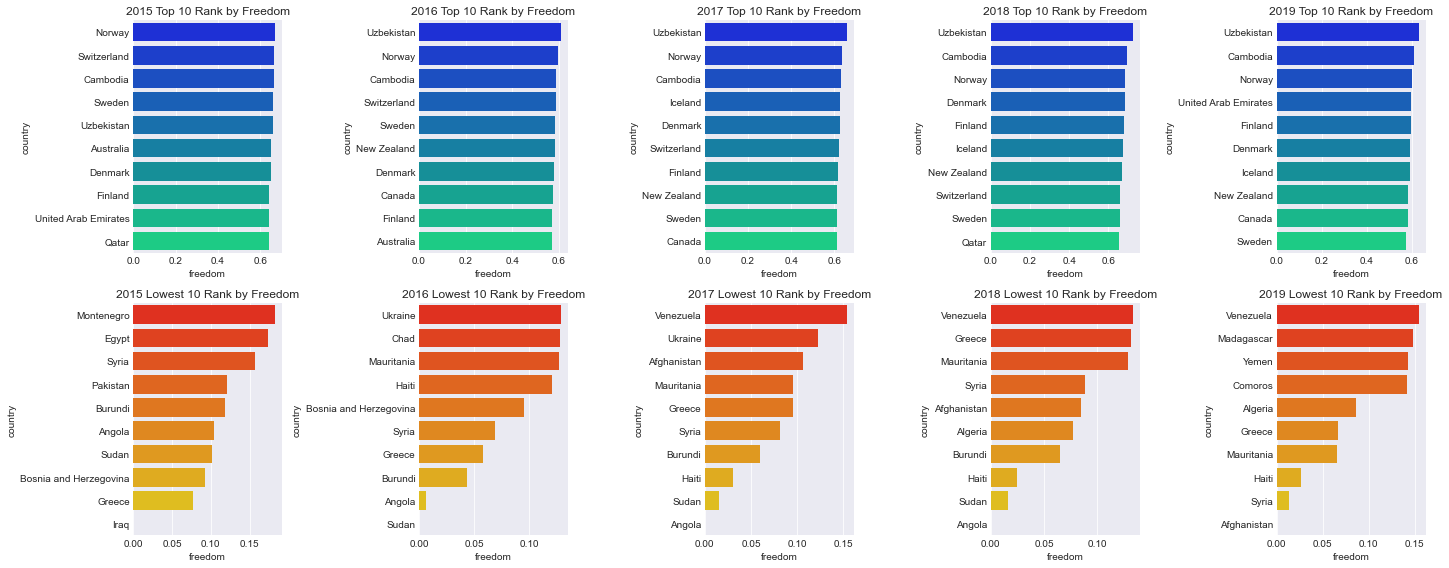

In [49]:
fig, ax = plt.subplots(2, 5, figsize = (20, 8))
years = df["year"].unique()
for year in range(len(years)):
    sns.barplot(x = "freedom", y = "country",
                data = df[df["year"] == years[year]].sort_values("freedom", ascending = False).head(10), palette = "winter", ax = ax[0, year])
    ax[0, year].set_title(str(years[year]) + " Top 10 Rank by Freedom")
    sns.barplot(x = "freedom", y = "country",
                data = df[df["year"] == years[year]].sort_values("freedom", ascending = False).tail(10), palette = "autumn", ax = ax[1, year])
    ax[1, year].set_title(str(years[year]) + " Lowest 10 Rank by Freedom")
plt.tight_layout()
plt.show()

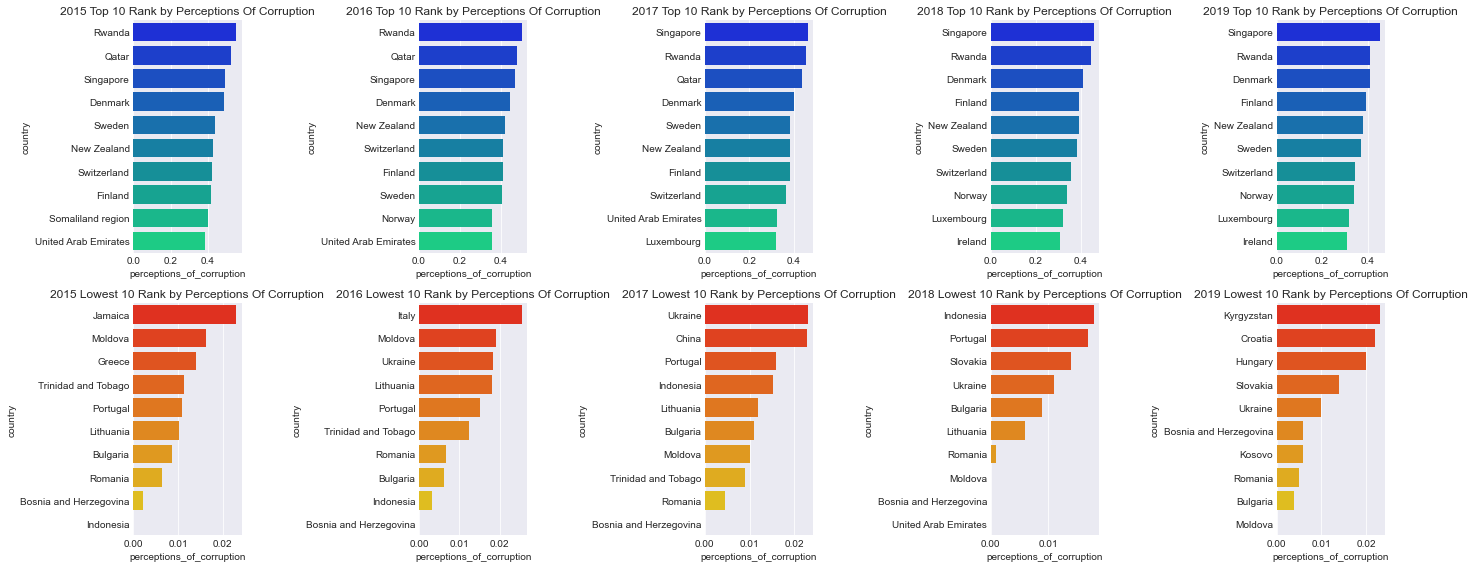

In [50]:
fig, ax = plt.subplots(2, 5, figsize = (20, 8))
years = df["year"].unique()
for year in range(len(years)):
    sns.barplot(x = "perceptions_of_corruption", y = "country",
                data = df[df["year"] == years[year]].sort_values("perceptions_of_corruption", ascending = False).head(10), palette = "winter", ax = ax[0, year])
    ax[0, year].set_title(str(years[year]) + " Top 10 Rank by Perceptions Of Corruption")
    sns.barplot(x = "perceptions_of_corruption", y = "country",
                data = df[df["year"] == years[year]].sort_values("perceptions_of_corruption", ascending = False).tail(10), palette = "autumn", ax = ax[1, year])
    ax[1, year].set_title(str(years[year]) + " Lowest 10 Rank by Perceptions Of Corruption")
plt.tight_layout()
plt.show()

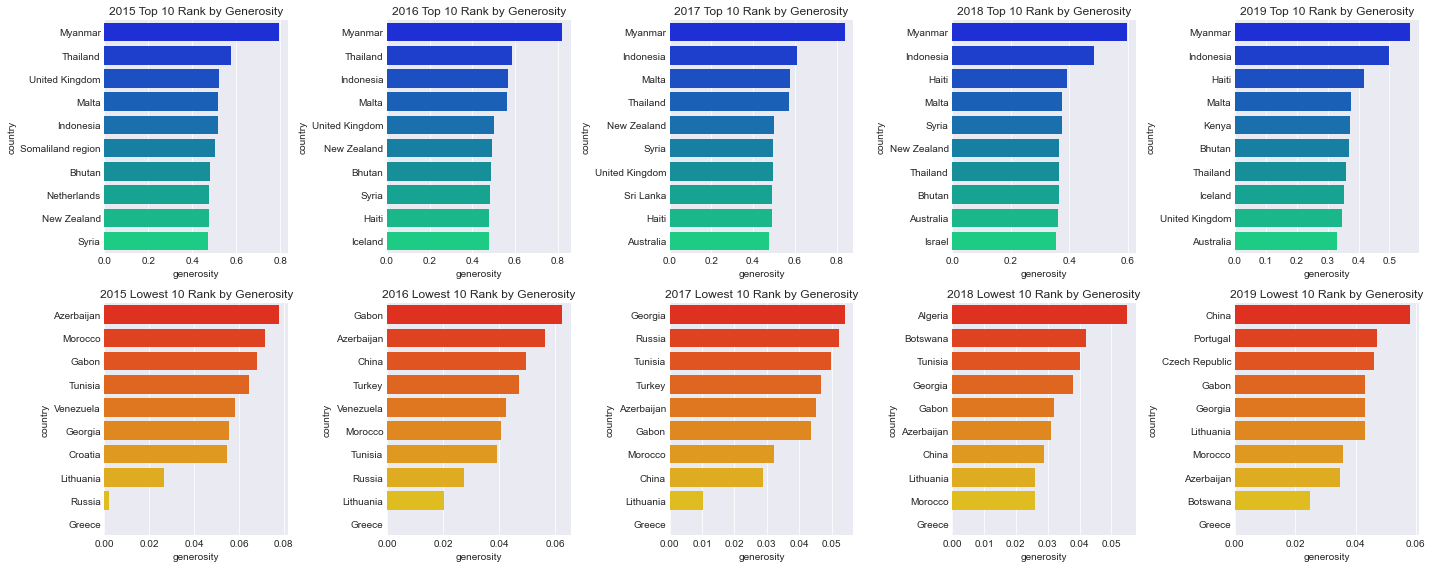

In [51]:
fig, ax = plt.subplots(2, 5, figsize = (20, 8))
years = df["year"].unique()
for year in range(len(years)):
    sns.barplot(x = "generosity", y = "country",
                data = df[df["year"] == years[year]].sort_values("generosity", ascending = False).head(10), palette = "winter", ax = ax[0, year])
    ax[0, year].set_title(str(years[year]) + " Top 10 Rank by Generosity")
    sns.barplot(x = "generosity", y = "country",
                data = df[df["year"] == years[year]].sort_values("generosity", ascending = False).tail(10), palette = "autumn", ax = ax[1, year])
    ax[1, year].set_title(str(years[year]) + " Lowest 10 Rank by Generosity")
plt.tight_layout()
plt.show()

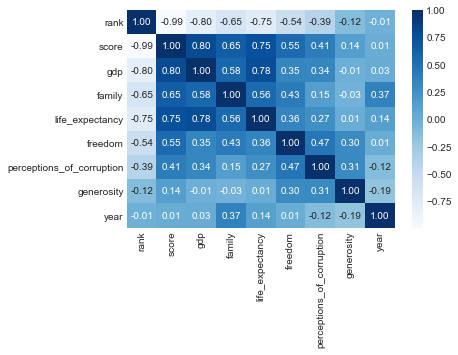

In [52]:
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "Blues")
plt.show()

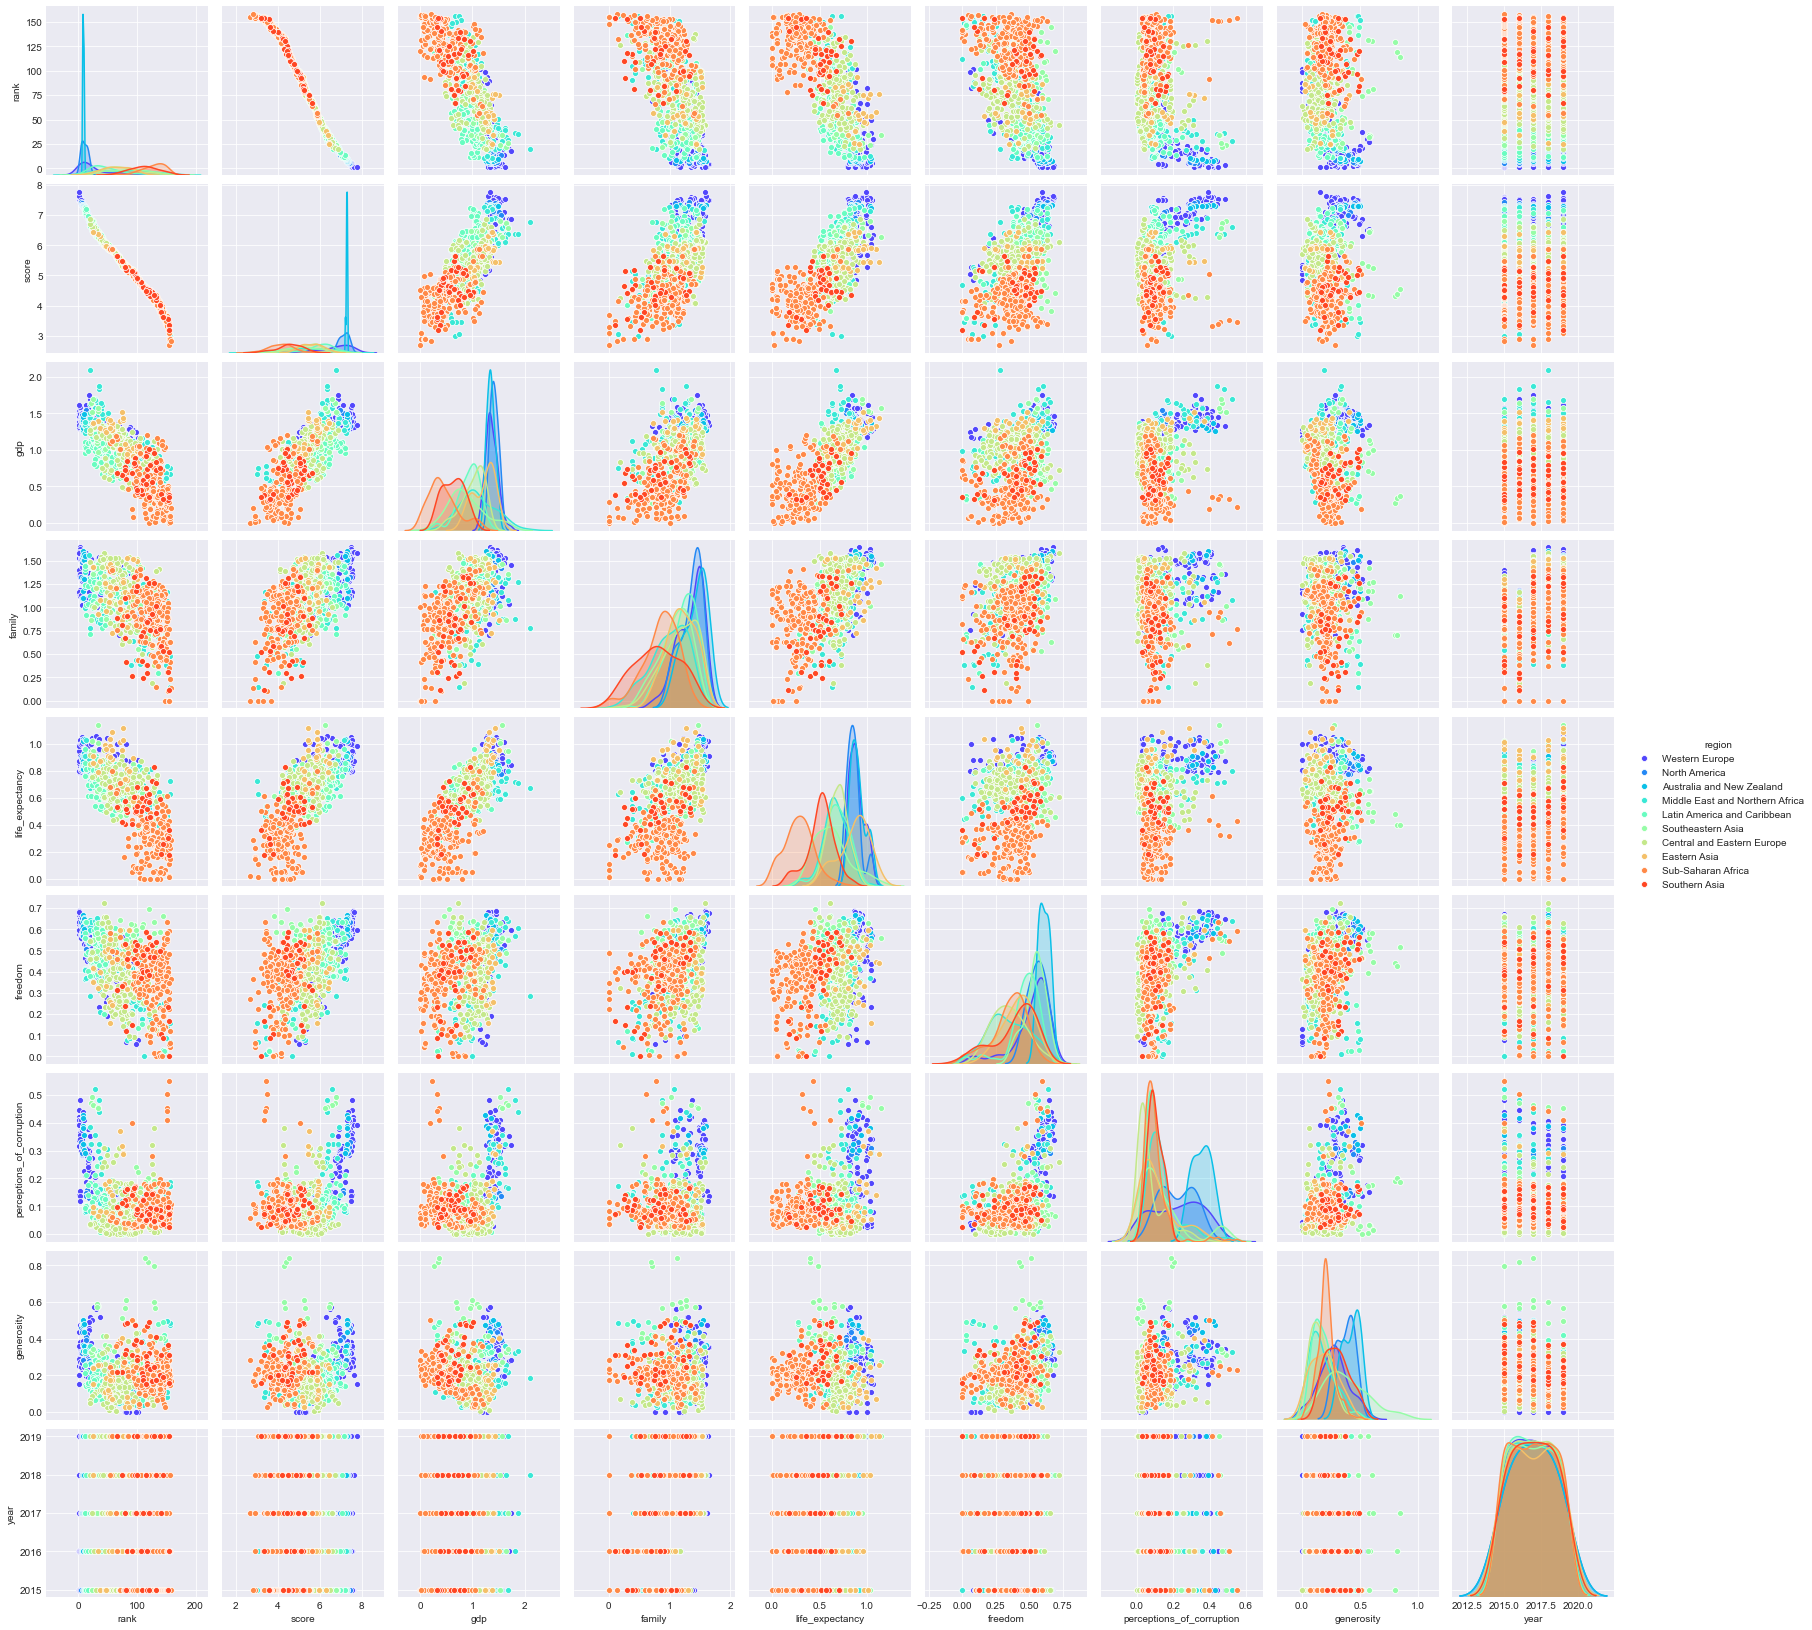

In [53]:
sns.pairplot(df, hue = "region", palette = "rainbow")
plt.show()

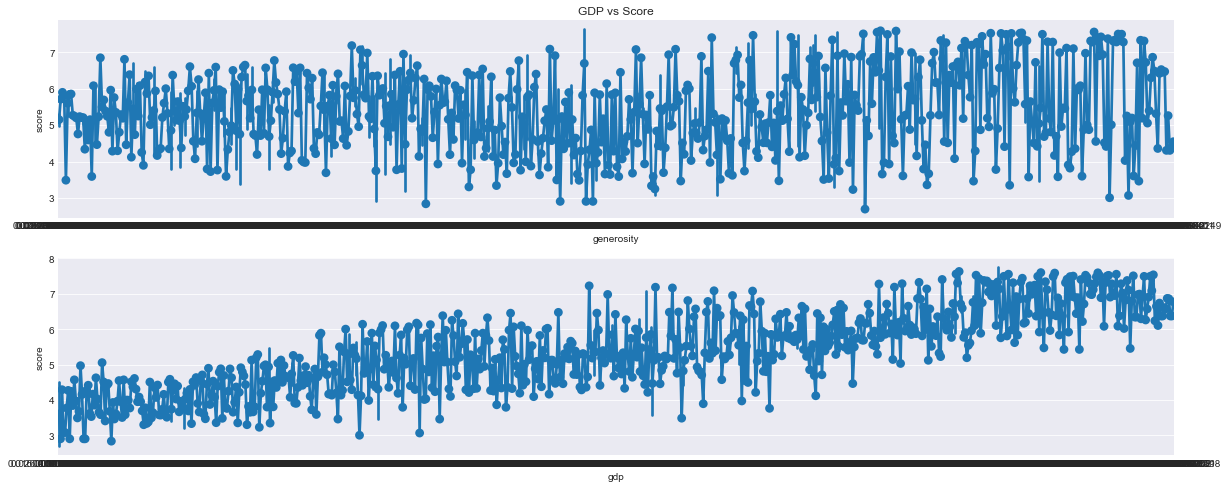

In [54]:
fig, ax = plt.subplots(2, 1, figsize = (20, 8))
sns.pointplot(x = "generosity", y = "score", data = df, ax = ax[0]); ax[0].set_title("Generosity vs Score")
sns.pointplot(x = "gdp", y = "score", data = df, ax = ax[1]); ax[0].set_title("GDP vs Score")
plt.show()

---
## **2. PREPARE THE DATA**
---

**DATA CLEANING**

In [28]:
data = df.copy()

In [29]:
data.isnull().sum()

country                      0
rank                         0
score                        0
gdp                          0
family                       0
life_expectancy              0
freedom                      0
perceptions_of_corruption    1
generosity                   0
year                         0
region                       0
dtype: int64

In [30]:
data = data.dropna()

**FEATURE SELECTION**

In [31]:
data.head()

country  rank  score      gdp    family  life_expectancy   freedom  \
0  Switzerland     1  7.587  1.39651  1.349510         0.941430  0.665570   
1  Switzerland     2  7.509  1.52733  1.145240         0.863030  0.585570   
2  Switzerland     4  7.494  1.56498  1.516912         0.858131  0.620071   
3  Switzerland     5  7.487  1.42000  1.549000         0.927000  0.660000   
4  Switzerland     6  7.480  1.45200  1.526000         1.052000  0.572000   

   perceptions_of_corruption  generosity  year          region  
0                   0.419780    0.296780  2015  Western Europe  
1                   0.412030    0.280830  2016  Western Europe  
2                   0.367007    0.290549  2017  Western Europe  
3                   0.357000    0.256000  2018  Western Europe  
4                   0.343000    0.263000  2019  Western Europe

In [32]:
data = pd.concat([data, pd.DataFrame(pd.get_dummies(data["region"], prefix = "region", drop_first = True))], axis = 1)

In [33]:
data = data.drop(["region", "country", "rank", "year"], axis = 1)

In [34]:
#sm.add_constant(data_graph["AveragePrice"])
model = sm.OLS(data["score"], data.drop("score", axis = 1))
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  score   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              5108.
Date:                Fri, 04 Sep 2020   Prob (F-statistic):                        0.00
Time:                        01:39:07   Log-Likelihood:                         -604.90
No. Observations:                 756   AIC:                                      1240.
Df Residuals:                     741   BIC:                                      1309.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------

**FEATURE SCALING**

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = data.drop("score", axis = 1).values
y = data["score"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---
## **3. EXPLORE MANY DIFFERENT MODELS**
---

We train our data using regression algorithm and check which algorithm have the best performance.
- We will train using default parameter and check which algorithm have highest recall score.
- We will find the best parameter for each algorithm using grid search and check the score using cross validate
- After we train the data using new parameter, we choose 5 algorithm which have highest recall score.
- We will use voting regressor to increase the performance from our model

In [39]:
# Algorithm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, Lars, BayesianRidge, SGDRegressor, PassiveAggressiveRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

# Decomposition
from sklearn.decomposition import PCA

# Preprocessing
from sklearn.preprocessing import PolynomialFeatures

#Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Validation
from sklearn.model_selection import cross_validate, cross_val_predict

#Hyper Parameter
from sklearn.model_selection import GridSearchCV

#Ensemble
from sklearn.ensemble import VotingRegressor

In [40]:
algorithm = {
    'Logistic Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
#     'Lars': Lars(),
    'Bayesian Ridge Regression': BayesianRidge(),
    'SGD Regressor': SGDRegressor(),
    'Passive Aggressive Regressor': PassiveAggressiveRegressor(),
    'K Neighbors Classifier': KNeighborsRegressor(),
    'SVR': SVR(),
    'Decision Tree Classifier': DecisionTreeRegressor(),
#     'Gaussian Process Regressor': GaussianProcessRegressor(),
}

In [41]:
poly = PolynomialFeatures(2, interaction_only = True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [42]:
def get_scoring(model):
    scores = {}
    score = cross_validate(estimator = model, X = X_train_poly, y = y_train, cv = 10,
                  scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
    for key, value in score.items():
        if key == "test_r2":
            scores[key] = (round(value.mean(),4))
        else:
            scores[key] = (-1 * round(value.mean(),4))
        scores[key + 'std'] = (round(value.std(),4))
    return scores

In [43]:
results = {}
parameter = None
for key, value in algorithm.items():
    results[key] = get_scoring(value)
results = pd.DataFrame(results)
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })

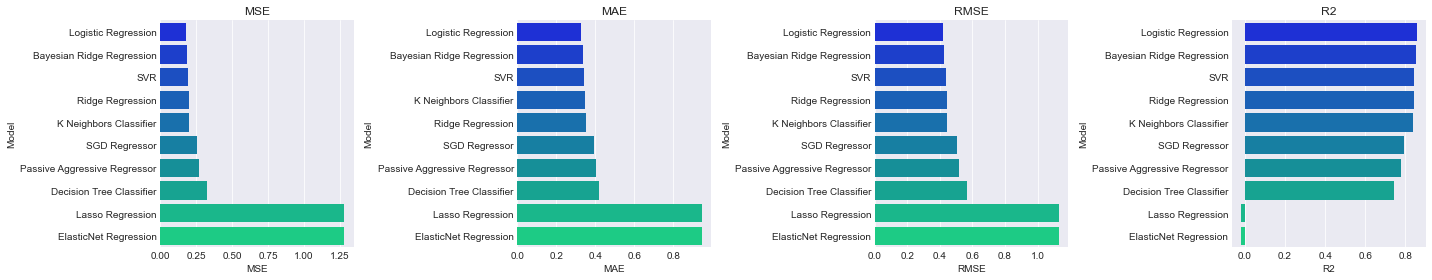

In [44]:
results = results.T.reset_index()
results.rename(columns = {'index': 'Model'}, inplace = True)
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 1, inplace = True)

# ALGORITHM COMPARISON
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.barplot(x = 'MSE', y = 'Model', data = results.sort_values('MSE', ascending = True), palette = 'winter', ax = ax[0])
sns.barplot(x = 'MAE', y = 'Model', data = results.sort_values('MAE', ascending = True), palette = 'winter', ax = ax[1])
sns.barplot(x = 'RMSE', y = 'Model', data = results.sort_values('RMSE', ascending = True), palette = 'winter', ax = ax[2])
sns.barplot(x = 'R2', y = 'Model', data = results.sort_values('R2', ascending = False), palette = 'winter', ax = ax[3])
ax[0].set_title("MSE")
ax[1].set_title("MAE")
ax[2].set_title("RMSE")
ax[3].set_title("R2")
plt.tight_layout()
plt.show()

In [45]:
results

Model     MSE  MSE Std     MAE  MAE Std    RMSE  \
0           Logistic Regression  0.1776   0.0375  0.3247   0.0338  0.4191   
1              Ridge Regression  0.1980   0.0410  0.3497   0.0369  0.4426   
2              Lasso Regression  1.2821   0.1097  0.9458   0.0706  1.1312   
3         ElasticNet Regression  1.2821   0.1097  0.9458   0.0706  1.1312   
4     Bayesian Ridge Regression  0.1839   0.0436  0.3359   0.0381  0.4258   
5                 SGD Regressor  0.2579   0.0465  0.3927   0.0348  0.5057   
6  Passive Aggressive Regressor  0.2716   0.0823  0.4027   0.0683  0.5152   
7        K Neighbors Classifier  0.2009   0.0397  0.3480   0.0341  0.4457   
8                           SVR  0.1958   0.0437  0.3442   0.0388  0.4396   
9      Decision Tree Classifier  0.3237   0.0750  0.4205   0.0565  0.5652   

   RMSE Std      R2  R2 Std  
0    0.0449  0.8573  0.0323  
1    0.0464  0.8415  0.0333  
2    0.0501 -0.0213  0.0426  
3    0.0501 -0.0213  0.0426  
4    0.0510  0.8529  0.0341  
5    0.0458  0.7919  0.0501  
6    0.0783  0.7806  0.0737  
7    0.0477  0.8385  0.0355  
8    0.0504  0.8429  0.0377  
9    0.0656  0.7440  0.0472

### LINEAR REGRESSION

In [46]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [47]:
scores = {}
score = cross_validate(estimator = model, X = X_train_poly, y = y_train, cv = 10,
                       scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
for key, value in score.items():
    scores[key] = (round(value.mean(),4))
    scores[key + 'std'] = (round(value.std(),4))

In [48]:
results = pd.DataFrame(scores.values(), index = scores.keys(), columns = ["score"])
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 0, inplace = True)
results = results.T

In [49]:
results

MSE  MSE Std     MAE  MAE Std    RMSE  RMSE Std      R2  R2 Std
score -0.1776   0.0375 -0.3247   0.0338 -0.4191    0.0449  0.8573  0.0323

### RIDGE REGRESSION

In [50]:
model = Ridge()
parameters = {"alpha": range(1, 6)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"], refit = False)
gscv.fit(X_train_poly, y_train)

GridSearchCV(cv=10, estimator=Ridge(), param_grid={'alpha': range(1, 6)},
             refit=False,
             scoring=['neg_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_root_mean_squared_error', 'r2'])

In [51]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_neg_mean_squared_error")
gscv_res.head(1)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.00379      0.002597         0.003093        0.002158           1   

         params  split0_test_neg_mean_squared_error  \
0  {'alpha': 1}                           -0.204644   

   split1_test_neg_mean_squared_error  split2_test_neg_mean_squared_error  \
0                            -0.23696                           -0.190165   

   split3_test_neg_mean_squared_error  ...  split3_test_r2  split4_test_r2  \
0                           -0.141167  ...         0.89575        0.856961   

   split5_test_r2  split6_test_r2  split7_test_r2  split8_test_r2  \
0        0.821132        0.809426         0.81941        0.878704   

   split9_test_r2  mean_test_r2  std_test_r2  rank_test_r2  
0         0.87908      0.841482     0.033276             1  

[1 rows x 58 columns]

In [52]:
model = Ridge(alpha = 1)
model.fit(X_train_poly, y_train)

Ridge(alpha=1)

In [53]:
scores = {}
score = cross_validate(estimator = model, X = X_train_poly, y = y_train, cv = 10,
                       scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
for key, value in score.items():
    scores[key] = (round(value.mean(),4))
    scores[key + 'std'] = (round(value.std(),4))

In [54]:
results = pd.DataFrame(scores.values(), index = scores.keys(), columns = ["score"])
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 0, inplace = True)
results = results.T

In [55]:
results

MSE  MSE Std     MAE  MAE Std    RMSE  RMSE Std      R2  R2 Std
score -0.198    0.041 -0.3497   0.0369 -0.4426    0.0464  0.8415  0.0333

### LASSO REGRESSION

In [56]:
model = Lasso()
parameters = {"alpha": range(1, 6)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"], refit = False)
gscv.fit(X_train_poly, y_train)

GridSearchCV(cv=10, estimator=Lasso(), param_grid={'alpha': range(1, 6)},
             refit=False,
             scoring=['neg_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_root_mean_squared_error', 'r2'])

In [57]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_neg_mean_squared_error")
gscv_res.head(1)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.002191      0.001599         0.003689        0.002962           1   

         params  split0_test_neg_mean_squared_error  \
0  {'alpha': 1}                            -1.00898   

   split1_test_neg_mean_squared_error  split2_test_neg_mean_squared_error  \
0                           -1.233313                           -1.267957   

   split3_test_neg_mean_squared_error  ...  split3_test_r2  split4_test_r2  \
0                           -1.378752  ...       -0.018186       -0.005816   

   split5_test_r2  split6_test_r2  split7_test_r2  split8_test_r2  \
0       -0.007372       -0.007895       -0.007761        -0.14824   

   split9_test_r2  mean_test_r2  std_test_r2  rank_test_r2  
0       -0.012766     -0.021265     0.042633             1  

[1 rows x 58 columns]

In [58]:
model = Lasso(alpha = 1)
model.fit(X_train_poly, y_train)

Lasso(alpha=1)

In [59]:
scores = {}
score = cross_validate(estimator = model, X = X_train_poly, y = y_train, cv = 10,
                       scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
for key, value in score.items():
    scores[key] = (round(value.mean(),4))
    scores[key + 'std'] = (round(value.std(),4))

In [60]:
results = pd.DataFrame(scores.values(), index = scores.keys(), columns = ["score"])
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 0, inplace = True)
results = results.T

In [61]:
results

MSE  MSE Std     MAE  MAE Std    RMSE  RMSE Std      R2  R2 Std
score -1.2821   0.1097 -0.9458   0.0706 -1.1312    0.0501 -0.0213  0.0426

### ELASTIC NET

In [62]:
model = ElasticNet()
parameters = {"alpha": range(1, 6), "l1_ratio": np.linspace(0.1, 1, 10)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"], refit = False)
gscv.fit(X_train_poly, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': range(1, 6),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             refit=False,
             scoring=['neg_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_root_mean_squared_error', 'r2'])

In [63]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_neg_mean_squared_error")
gscv_res.head(1)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.001794      0.000744         0.001528        0.000536           1   

  param_l1_ratio                         params  \
0            0.1  {'alpha': 1, 'l1_ratio': 0.1}   

   split0_test_neg_mean_squared_error  split1_test_neg_mean_squared_error  \
0                           -0.783483                            -0.96161   

   split2_test_neg_mean_squared_error  ...  split3_test_r2  split4_test_r2  \
0                           -0.984466  ...        0.216337        0.246195   

   split5_test_r2  split6_test_r2  split7_test_r2  split8_test_r2  \
0        0.221137        0.221616         0.23323         0.10881   

   split9_test_r2  mean_test_r2  std_test_r2  rank_test_r2  
0         0.23583      0.214694     0.036364             1  

[1 rows x 59 columns]

In [64]:
model = ElasticNet(alpha = 1, l1_ratio = 0.1)
model.fit(X_train_poly, y_train)

ElasticNet(alpha=1, l1_ratio=0.1)

In [65]:
scores = {}
score = cross_validate(estimator = model, X = X_train_poly, y = y_train, cv = 10,
                       scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
for key, value in score.items():
    scores[key] = (round(value.mean(),4))
    scores[key + 'std'] = (round(value.std(),4))

In [66]:
results = pd.DataFrame(scores.values(), index = scores.keys(), columns = ["score"])
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 0, inplace = True)
results = results.T

In [67]:
results

MSE  MSE Std    MAE  MAE Std    RMSE  RMSE Std      R2  R2 Std
score -0.9856   0.0841 -0.828   0.0591 -0.9918    0.0437  0.2147  0.0364

### BAYESIAN RIDGE

In [68]:
model = BayesianRidge()
parameters = {"alpha_1": [1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01], "alpha_2": [1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01], "lambda_1": [1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01], "lambda_2": [1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01]}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"], refit = False)
gscv.fit(X_train_poly, y_train)

GridSearchCV(cv=10, estimator=BayesianRidge(),
             param_grid={'alpha_1': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1],
                         'alpha_2': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1],
                         'lambda_1': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1],
                         'lambda_2': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]},
             refit=False,
             scoring=['neg_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_root_mean_squared_error', 'r2'])

In [69]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_neg_mean_squared_error")
gscv_res.head(1)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1085       0.012758      0.002071         0.001794        0.000598   

     param_alpha_1 param_alpha_2 param_lambda_1 param_lambda_2  \
1085           0.1         1e-06          1e-06            0.1   

                                                 params  \
1085  {'alpha_1': 0.1, 'alpha_2': 1e-06, 'lambda_1':...   

      split0_test_neg_mean_squared_error  ...  split3_test_r2  split4_test_r2  \
1085                           -0.185665  ...         0.91314        0.864981   

      split5_test_r2  split6_test_r2  split7_test_r2  split8_test_r2  \
1085        0.835261        0.813641        0.824207        0.886519   

      split9_test_r2  mean_test_r2  std_test_r2  rank_test_r2  
1085        0.887806      0.852992     0.034165             1  

[1 rows x 61 columns]

In [70]:
model = BayesianRidge(alpha_1 = 0.1, alpha_2 = 1e-06, lambda_1 = 1e-06, lambda_2 = 0.1)
model.fit(X_train_poly, y_train)

BayesianRidge(alpha_1=0.1, lambda_2=0.1)

In [71]:
scores = {}
score = cross_validate(estimator = model, X = X_train_poly, y = y_train, cv = 10,
                       scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
for key, value in score.items():
    scores[key] = (round(value.mean(),4))
    scores[key + 'std'] = (round(value.std(),4))

In [72]:
results = pd.DataFrame(scores.values(), index = scores.keys(), columns = ["score"])
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 0, inplace = True)
results = results.T

In [73]:
results

MSE  MSE Std     MAE  MAE Std    RMSE  RMSE Std     R2  R2 Std
score -0.1838   0.0436 -0.3357   0.0381 -0.4257    0.0511  0.853  0.0342

### SGD REGRESSOR

In [74]:
model = SGDRegressor()
parameters = {"l1_ratio": np.linspace(0.1, 1, 10)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"], refit = False)
gscv.fit(X_train_poly, y_train)

GridSearchCV(cv=10, estimator=SGDRegressor(),
             param_grid={'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             refit=False,
             scoring=['neg_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_root_mean_squared_error', 'r2'])

In [75]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_neg_mean_squared_error")
gscv_res.head(1)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
8       0.005282      0.000893         0.001297        0.000457   

  param_l1_ratio             params  split0_test_neg_mean_squared_error  \
8            0.9  {'l1_ratio': 0.9}                           -0.324873   

   split1_test_neg_mean_squared_error  split2_test_neg_mean_squared_error  \
8                           -0.303181                           -0.256029   

   split3_test_neg_mean_squared_error  ...  split3_test_r2  split4_test_r2  \
8                           -0.193143  ...        0.857367        0.820894   

   split5_test_r2  split6_test_r2  split7_test_r2  split8_test_r2  \
8        0.750912        0.801947        0.789878        0.822497   

   split9_test_r2  mean_test_r2  std_test_r2  rank_test_r2  
8         0.84801      0.792082     0.050423             1  

[1 rows x 58 columns]

In [76]:
model = SGDRegressor(l1_ratio = 0.9)
model.fit(X_train_poly, y_train)

SGDRegressor(l1_ratio=0.9)

In [77]:
scores = {}
score = cross_validate(estimator = model, X = X_train_poly, y = y_train, cv = 10,
                       scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
for key, value in score.items():
    scores[key] = (round(value.mean(),4))
    scores[key + 'std'] = (round(value.std(),4))

In [78]:
results = pd.DataFrame(scores.values(), index = scores.keys(), columns = ["score"])
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 0, inplace = True)
results = results.T

In [79]:
results

MSE  MSE Std     MAE  MAE Std    RMSE  RMSE Std      R2  R2 Std
score -0.2573   0.0499 -0.3922   0.0368 -0.5048    0.0492  0.7921  0.0536

### PASSIVE AGGRESIVE REGRESSOR

In [80]:
model = PassiveAggressiveRegressor()
parameters = {"C": range(1, 6)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"], refit = False)
gscv.fit(X_train_poly, y_train)

GridSearchCV(cv=10, estimator=PassiveAggressiveRegressor(),
             param_grid={'C': range(1, 6)}, refit=False,
             scoring=['neg_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_root_mean_squared_error', 'r2'])

In [81]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_neg_mean_squared_error")
gscv_res.head(1)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.007581      0.002108         0.001298        0.000456       1   

     params  split0_test_neg_mean_squared_error  \
0  {'C': 1}                           -0.319298   

   split1_test_neg_mean_squared_error  split2_test_neg_mean_squared_error  \
0                           -0.830889                           -0.168588   

   split3_test_neg_mean_squared_error  ...  split3_test_r2  split4_test_r2  \
0                            -0.30376  ...        0.775678         0.69699   

   split5_test_r2  split6_test_r2  split7_test_r2  split8_test_r2  \
0        0.778258        0.771131        0.774744        0.463353   

   split9_test_r2  mean_test_r2  std_test_r2  rank_test_r2  
0         0.77727      0.691348     0.158608             1  

[1 rows x 58 columns]

In [82]:
model = PassiveAggressiveRegressor(C = 4)
model.fit(X_train_poly, y_train)

PassiveAggressiveRegressor(C=4)

In [83]:
scores = {}
score = cross_validate(estimator = model, X = X_train_poly, y = y_train, cv = 10,
                       scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
for key, value in score.items():
    scores[key] = (round(value.mean(),4))
    scores[key + 'std'] = (round(value.std(),4))

In [84]:
results = pd.DataFrame(scores.values(), index = scores.keys(), columns = ["score"])
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 0, inplace = True)
results = results.T

In [85]:
results

MSE  MSE Std   MAE  MAE Std    RMSE  RMSE Std      R2  R2 Std
score -0.4137   0.1956 -0.51   0.1252 -0.6267    0.1446  0.6747  0.1358

### KNN

In [86]:
model = KNeighborsRegressor()
parameters = {"n_neighbors": range(1, 6), "leaf_size": [10, 20, 30, 40], "p": range(1, 6)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"], refit = False)
gscv.fit(X_train_poly, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': [10, 20, 30, 40],
                         'n_neighbors': range(1, 6), 'p': range(1, 6)},
             refit=False,
             scoring=['neg_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_root_mean_squared_error', 'r2'])

In [87]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_neg_mean_squared_error")
gscv_res.head(1)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
85       0.009275      0.000896          0.00748        0.000805   

   param_leaf_size param_n_neighbors param_p  \
85              40                 3       1   

                                         params  \
85  {'leaf_size': 40, 'n_neighbors': 3, 'p': 1}   

    split0_test_neg_mean_squared_error  split1_test_neg_mean_squared_error  \
85                            -0.17524                           -0.145345   

    ...  split3_test_r2  split4_test_r2  split5_test_r2  split6_test_r2  \
85  ...        0.910513         0.83474        0.886239        0.897555   

    split7_test_r2  split8_test_r2  split9_test_r2  mean_test_r2  std_test_r2  \
85        0.849884        0.904966        0.922713      0.876704     0.032004   

    rank_test_r2  
85             1  

[1 rows x 60 columns]

In [88]:
model = KNeighborsRegressor(n_neighbors = 3, leaf_size = 40, p = 1)
model.fit(X_train_poly, y_train)

KNeighborsRegressor(leaf_size=40, n_neighbors=3, p=1)

In [89]:
scores = {}
score = cross_validate(estimator = model, X = X_train_poly, y = y_train, cv = 10,
                       scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
for key, value in score.items():
    scores[key] = (round(value.mean(),4))
    scores[key + 'std'] = (round(value.std(),4))

In [90]:
results = pd.DataFrame(scores.values(), index = scores.keys(), columns = ["score"])
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 0, inplace = True)
results = results.T

In [91]:
results

MSE  MSE Std     MAE  MAE Std    RMSE  RMSE Std      R2  R2 Std
score -0.1527   0.0327 -0.2978   0.0267 -0.3884    0.0423  0.8767   0.032

### SVR

In [92]:
model = SVR()
parameters = {"C": range(1, 11), "degree": range(1, 11)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"], refit = False)
gscv.fit(X_train_poly, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': range(1, 11), 'degree': range(1, 11)},
             refit=False,
             scoring=['neg_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_root_mean_squared_error', 'r2'])

In [93]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_neg_mean_squared_error")
gscv_res.head(1)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
99       0.071612      0.001315         0.006875        0.000297      10   

   param_degree                   params  split0_test_neg_mean_squared_error  \
99           10  {'C': 10, 'degree': 10}                           -0.158913   

    split1_test_neg_mean_squared_error  split2_test_neg_mean_squared_error  \
99                           -0.192145                           -0.147251   

    ...  split3_test_r2  split4_test_r2  split5_test_r2  split6_test_r2  \
99  ...        0.919779        0.872884        0.856699        0.842151   

    split7_test_r2  split8_test_r2  split9_test_r2  mean_test_r2  std_test_r2  \
99        0.858843        0.898773        0.908861      0.872801     0.027252   

    rank_test_r2  
99             1  

[1 rows x 59 columns]

In [94]:
model = SVR(C = 10, degree = 10)
model.fit(X_train_poly, y_train)

SVR(C=10, degree=10)

In [95]:
scores = {}
score = cross_validate(estimator = model, X = X_train_poly, y = y_train, cv = 10,
                       scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
for key, value in score.items():
    scores[key] = (round(value.mean(),4))
    scores[key + 'std'] = (round(value.std(),4))

In [96]:
results = pd.DataFrame(scores.values(), index = scores.keys(), columns = ["score"])
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 0, inplace = True)
results = results.T

In [97]:
results

MSE  MSE Std     MAE  MAE Std    RMSE  RMSE Std      R2  R2 Std
score -0.1589   0.0341 -0.3046    0.031 -0.3963     0.043  0.8728  0.0273

### DECISION TREE

In [98]:
model = DecisionTreeRegressor(criterion = "mse")
parameters = {"max_depth": range(1, 11), "min_samples_split": range(2, 11), "min_samples_leaf": range(1, 11)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"], refit = False)
gscv.fit(X_train_poly, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(2, 11)},
             refit=False,
             scoring=['neg_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_root_mean_squared_error', 'r2'])

In [99]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_neg_mean_squared_error")
gscv_res.head(1)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
770       0.010873      0.000301         0.001493        0.000495   

    param_max_depth param_min_samples_leaf param_min_samples_split  \
770               9                      6                       7   

                                                params  \
770  {'max_depth': 9, 'min_samples_leaf': 6, 'min_s...   

     split0_test_neg_mean_squared_error  split1_test_neg_mean_squared_error  \
770                           -0.227884                           -0.398258   

     ...  split3_test_r2  split4_test_r2  split5_test_r2  split6_test_r2  \
770  ...        0.838384        0.835963        0.808453        0.760666   

     split7_test_r2  split8_test_r2  split9_test_r2  mean_test_r2  \
770        0.732694        0.797816        0.761385      0.780556   

     std_test_r2  rank_test_r2  
770     0.047752             1  

[1 rows x 60 columns]

In [100]:
model = DecisionTreeRegressor(criterion = "mse", max_depth = 6, min_samples_split = 3, min_samples_leaf = 1)
model.fit(X_train_poly, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_split=3)

In [101]:
scores = {}
score = cross_validate(estimator = model, X = X_train_poly, y = y_train, cv = 10,
                       scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
for key, value in score.items():
    scores[key] = (round(value.mean(),4))
    scores[key + 'std'] = (round(value.std(),4))

In [102]:
results = pd.DataFrame(scores.values(), index = scores.keys(), columns = ["score"])
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 0, inplace = True)
results = results.T

In [103]:
results

MSE  MSE Std    MAE  MAE Std    RMSE  RMSE Std      R2  R2 Std
score -0.2812   0.0674 -0.408    0.052 -0.5263    0.0653  0.7771  0.0464

### FINAL CHECK

In [104]:
algorithm = {
    'Logistic Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha = 1),
    'Lasso Regression': Lasso(alpha = 1),
    'ElasticNet Regression': ElasticNet(alpha = 1, l1_ratio = 0.1),
#     'Lars': Lars(),
    'Bayesian Ridge Regression': BayesianRidge(alpha_1 = 0.1, alpha_2 = 1e-06, lambda_1 = 1e-06, lambda_2 = 0.1),
    'SGD Regressor': SGDRegressor(l1_ratio = 0.9),
    'Passive Aggressive Regressor': PassiveAggressiveRegressor(C = 4),
    'K Neighbors Classifier': KNeighborsRegressor(n_neighbors = 3, leaf_size = 40, p = 1),
    'SVR': SVR(C = 10, degree = 10),
    'Decision Tree Classifier': DecisionTreeRegressor(criterion = "mse", max_depth = 6, min_samples_split = 3, min_samples_leaf = 1),
#     'Gaussian Process Regressor': GaussianProcessRegressor(),
}

In [105]:
poly = PolynomialFeatures(2, interaction_only = True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [106]:
def get_scoring(model):
    scores = {}
    score = cross_validate(estimator = model, X = X_train_poly, y = y_train, cv = 10,
                  scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
    for key, value in score.items():
        if key == "test_r2":
            scores[key] = (round(value.mean(),4))
        else:
            scores[key] = (-1 * round(value.mean(),4))
        scores[key + 'std'] = (round(value.std(),4))
    return scores

In [107]:
results = {}
parameter = None
for key, value in algorithm.items():
    results[key] = get_scoring(value)
results = pd.DataFrame(results)
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })

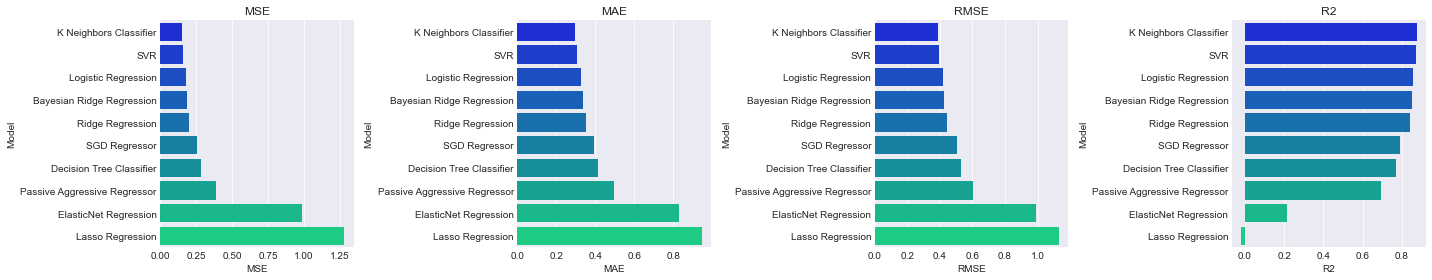

In [108]:
results = results.T.reset_index()
results.rename(columns = {'index': 'Model'}, inplace = True)
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 1, inplace = True)

# ALGORITHM COMPARISON
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.barplot(x = 'MSE', y = 'Model', data = results.sort_values('MSE', ascending = True), palette = 'winter', ax = ax[0])
sns.barplot(x = 'MAE', y = 'Model', data = results.sort_values('MAE', ascending = True), palette = 'winter', ax = ax[1])
sns.barplot(x = 'RMSE', y = 'Model', data = results.sort_values('RMSE', ascending = True), palette = 'winter', ax = ax[2])
sns.barplot(x = 'R2', y = 'Model', data = results.sort_values('R2', ascending = False), palette = 'winter', ax = ax[3])
ax[0].set_title("MSE")
ax[1].set_title("MAE")
ax[2].set_title("RMSE")
ax[3].set_title("R2")
plt.tight_layout()
plt.show()

In [109]:
results

Model     MSE  MSE Std     MAE  MAE Std    RMSE  \
0           Logistic Regression  0.1776   0.0375  0.3247   0.0338  0.4191   
1              Ridge Regression  0.1980   0.0410  0.3497   0.0369  0.4426   
2              Lasso Regression  1.2821   0.1097  0.9458   0.0706  1.1312   
3         ElasticNet Regression  0.9856   0.0841  0.8280   0.0591  0.9918   
4     Bayesian Ridge Regression  0.1838   0.0436  0.3357   0.0381  0.4257   
5                 SGD Regressor  0.2596   0.0501  0.3937   0.0360  0.5072   
6  Passive Aggressive Regressor  0.3864   0.1909  0.4964   0.1459  0.6040   
7        K Neighbors Classifier  0.1527   0.0327  0.2978   0.0267  0.3884   
8                           SVR  0.1589   0.0341  0.3046   0.0310  0.3963   
9      Decision Tree Classifier  0.2878   0.0714  0.4128   0.0559  0.5320   

   RMSE Std      R2  R2 Std  
0    0.0449  0.8573  0.0323  
1    0.0464  0.8415  0.0333  
2    0.0501 -0.0213  0.0426  
3    0.0437  0.2147  0.0364  
4    0.0511  0.8530  0.0342  
5    0.0491  0.7902  0.0537  
6    0.1471  0.6942  0.1520  
7    0.0423  0.8767  0.0320  
8    0.0430  0.8728  0.0273  
9    0.0687  0.7724  0.0482

---
## **4. FINE TUNE YOUR MODELS AND COMBINE THEM INTO A GREAT SOLUTION**
---

In [110]:
clf1 = KNeighborsRegressor(n_neighbors = 3, leaf_size = 40, p = 1)
clf2 = SVR(C = 10, degree = 10)
clf3 = LinearRegression()
clf4 = BayesianRidge(alpha_1 = 0.1, alpha_2 = 1e-06, lambda_1 = 1e-06, lambda_2 = 0.1)
clf5 = Ridge(alpha = 1)

eclf = VotingRegressor(estimators=[("mod1", clf1), ("mod2", clf2), ("mod3", clf3), ("mod4", clf4), ("mod5", clf5)])
eclf = eclf.fit(X_train_poly, y_train)

In [111]:
scores = {}
score = cross_validate(estimator = eclf, X = X_train_poly, y = y_train, cv = 10,
                       scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
for key, value in score.items():
    scores[key] = (round(value.mean(),4))
    scores[key + 'std'] = (round(value.std(),4))

In [112]:
results = pd.DataFrame(scores.values(), index = scores.keys(), columns = ["score"])
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 0, inplace = True)
results = results.T

In [113]:
results

MSE  MSE Std    MAE  MAE Std    RMSE  RMSE Std      R2  R2 Std
score -0.1538   0.0355 -0.303   0.0323 -0.3895    0.0463  0.8767  0.0291